<a href="https://colab.research.google.com/github/fabixXn/DATAV/blob/main/Copia_mlproyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANALSIS EXPLORATORIO DE LOS DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/train.csv')


In [3]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  1458644
No. of columns:  11


In [4]:
print("No. de filas :", df.shape[0])
print("No. de columnas:", df.shape[1])

No. de filas : 1458644
No. de columnas: 11


In [5]:
df = df.reset_index(drop=True)
#Mantener secuencia en los indices

In [6]:
df.head()


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [7]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Revisaremos las variables pickup_datetime y dropoff_datetime debido a que son de tipo object en lugar de datetime64.

In [8]:
# Missing values
print(df.isnull().sum())


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [9]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

En el paso anterior verificamos el clase de variables y podemos ver que tenemos de todo tipo, seguido de esto estaremos haciendo unas modificaciones en los tipos de variables para un mejor manejo de los datos.

In [10]:
# Transformando las columnas de fecha y hora (pickup y dropoff) en objetos de tipo datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [11]:
# Transformando vendor_id y store_and_fwd_flag a tipo de dato categórico
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [12]:
# Convirtiendo la variable de "Sí/No" a 1 y 0 y transformándola en tipo de dato categórico
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [13]:
# Muestra las primeras 10 filas
print(df.tail())

                id vendor_id     pickup_datetime    dropoff_datetime  \
1458639  id2376096         2 2016-04-08 13:31:04 2016-04-08 13:44:02   
1458640  id1049543         1 2016-01-10 07:35:15 2016-01-10 07:46:10   
1458641  id2304944         2 2016-04-22 06:57:41 2016-04-22 07:10:25   
1458642  id2714485         1 2016-01-05 15:56:26 2016-01-05 16:02:39   
1458643  id1209952         1 2016-04-05 14:44:25 2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1458639         -73.994911         40.740170                  0            778  
1458640         -73.970184

In [14]:
print("Startdate: ", df['pickup_datetime'].min())
print("Enddate: ", df['pickup_datetime'].max())


Startdate:  2016-01-01 00:00:17
Enddate:  2016-06-30 23:59:39


Tenemos datos en un rango de los primeros seis meses del año 2016.

In [15]:
# Creando nuevas características a partir de las columnas de fecha y hora

# Para la fecha y hora de recogida (pickup)
df['dia_recogida'] = df['pickup_datetime'].dt.day          # Día del mes
df['hora_recogida'] = df['pickup_datetime'].dt.hour        # Hora del día
df['dia_semana_recogida'] = df['pickup_datetime'].dt.weekday  # Día de la semana (0: Lunes, 6: Domingo)

# Para la fecha y hora de llegada (dropoff)
df['dia_llegada'] = df['dropoff_datetime'].dt.day          # Día del mes
df['hora_llegada'] = df['dropoff_datetime'].dt.hour        # Hora del día
df['dia_semana_llegada'] = df['dropoff_datetime'].dt.weekday  # Día de la semana (0: Lunes, 6: Domingo)


In [16]:
df.head()

id vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421         2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394         1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529         2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673         2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028         2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  dia_recogida  \
0         40.765602                  0            455            14   
1         40.731152                  0            663            12   
2         40.710087                  0           2124            19   
3         40.706718                  0            429             6   
4         40.782520                  0            435            26   

   hora_recogida  dia_semana_recogida  dia_llegada  hora_llegada  \
0             17                    0           14            17   
1              0                    6           12             0   
2             11                    1           19            12   
3             19                    2            6            19   
4             13                    5           26            13   

   dia_semana_llegada  
0                   0  
1                   6  
2                   1  
3                   2  
4                   5

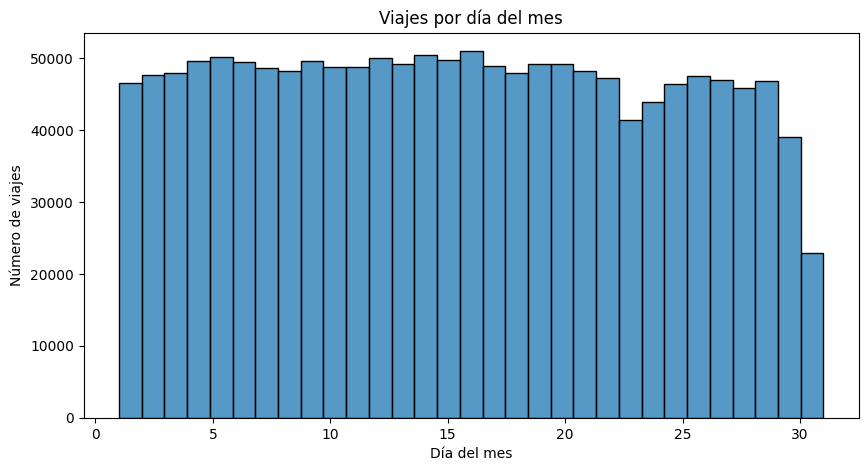

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


#Grafico 1:Viajes por día del mes.
plt.figure(figsize=(10, 5))
sns.histplot(df['dia_recogida'], bins=31, kde=False)
plt.xlabel('Día del mes')
plt.ylabel('Número de viajes')
plt.title('Viajes por día del mes')
plt.show()


El gráfico muestra una distribución relativamente uniforme de viajes por día del mes, con pequeñas fluctuaciones. Se observa una caída en los últimos días, especialmente el 31, posiblemente debido a meses sin ese día en la muestra. La mayoría de los días mantienen un número estable de viajes, aunque podrían existir efectos estacionales si el dataset abarca varios meses.

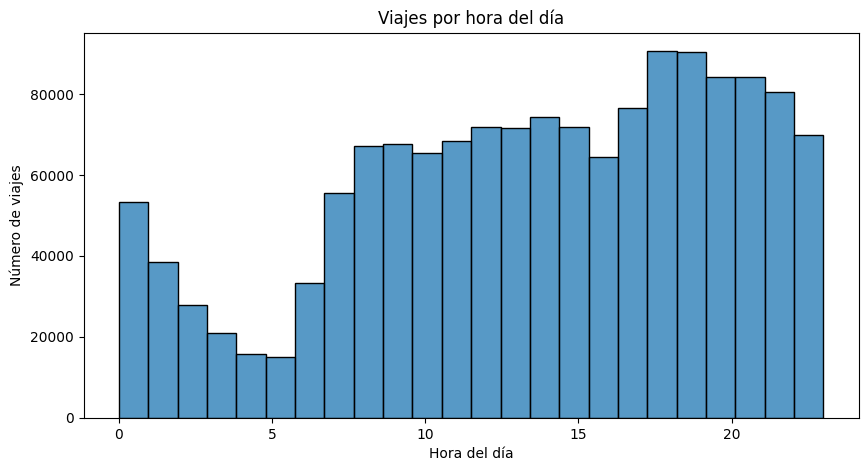

In [18]:
#Grafico 2:Viajes por hora del dia.
plt.figure(figsize=(10, 5))
sns.histplot(df['hora_recogida'], bins=24, kde=False)
plt.xlabel('Hora del día')
plt.ylabel('Número de viajes')
plt.title('Viajes por hora del día')
plt.show()

El gráfico muestra un alto número de viajes alrededor de la medianoche, seguido de una caída en la madrugada entre las 2 y 6 a.m., cuando la actividad es mínima. A partir de las 6 a.m., los viajes aumentan progresivamente, probablemente debido a desplazamientos matutinos. Se observa un segundo pico entre las 17 y 21 horas, lo que indica un incremento en la movilidad al final del día, posiblemente relacionado con la salida del trabajo y actividades recreativas.









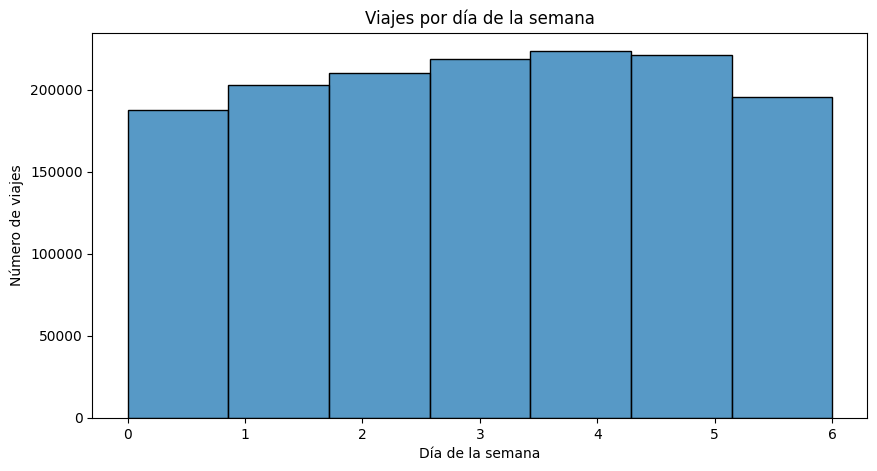

In [19]:
#Grafico 3:Viajes por día de la semana.

plt.figure(figsize=(10, 5))
sns.histplot(df['dia_semana_recogida'], bins=7, kde=False)
plt.xlabel('Día de la semana')
plt.ylabel('Número de viajes')
plt.title('Viajes por día de la semana')
plt.show()


El gráfico muestra que la cantidad de viajes varía a lo largo de la semana. Se observa un incremento progresivo desde el inicio de la semana, alcanzando su punto máximo entre el miércoles y el viernes. Durante el sábado y el domingo, la cantidad de viajes disminuye, lo que puede indicar una menor demanda de transporte en comparación con los días laborales.









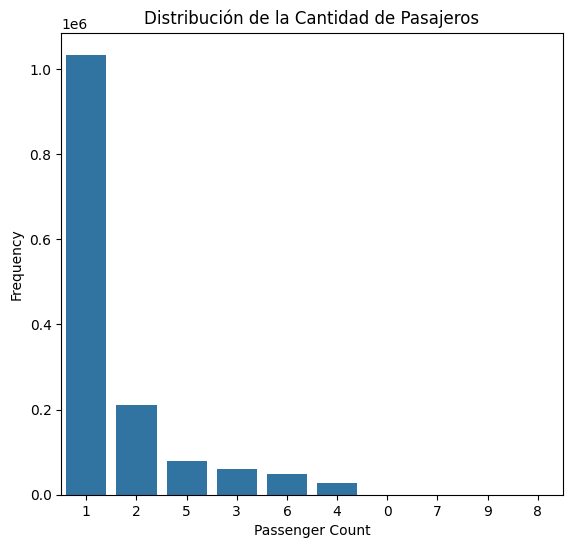

In [20]:
plt.figure(figsize=(22, 6))

# Passenger Count
plt.subplot(131)
sns.countplot(x=df['passenger_count'], order=df['passenger_count'].value_counts().index)
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribución de la Cantidad de Pasajeros')
plt.show()


La mayoría de los viajes tienen un solo pasajero, lo que sugiere un uso predominante de taxis para transporte individual.

In [64]:
df['vendor_id'] = df['vendor_id'].astype(int)  # Asegurar que es entero

plt.figure(figsize=(6, 4))
sns.countplot(y=df['vendor_id'], hue=df['vendor_id'], palette={1: "blue", 2: "red"}, legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('vendor_id')
plt.title('Distribución de vendor_id')
plt.show()



Se observa que hay dos proveedores de servicio (1 y 2), con una diferencia notable en la cantidad de viajes. El proveedor 2 tiene más registros que el proveedor 1, lo que sugiere que tiene una mayor participación en los datos analizados. Esta diferencia podría influir en el análisis, por lo que sería útil investigar si existen variaciones en la calidad o el comportamiento de los viajes según el proveedor.

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['store_and_fwd_flag'], palette={"0": "blue", "1": "orange"})
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frecuencia')
plt.title('Distribución de store_and_fwd_flag')
plt.show()


<ipython-input-22-843d6eac0414>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['store_and_fwd_flag'], palette={"0": "blue", "1": "orange"})


La gran mayoría de los viajes tienen un valor de 0 (o "N"), lo que significa que fueron transmitidos en tiempo real sin necesidad de almacenamiento previo.

In [23]:
df.trip_duration.describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

Observando nuestra variable de estudio nos damos cuenta de cosas inusuales como viajes muy extremos que pueden ser errores, datos átipicos ó errores del sofware, esto puede ser preocupante en un futuro para los modelos.

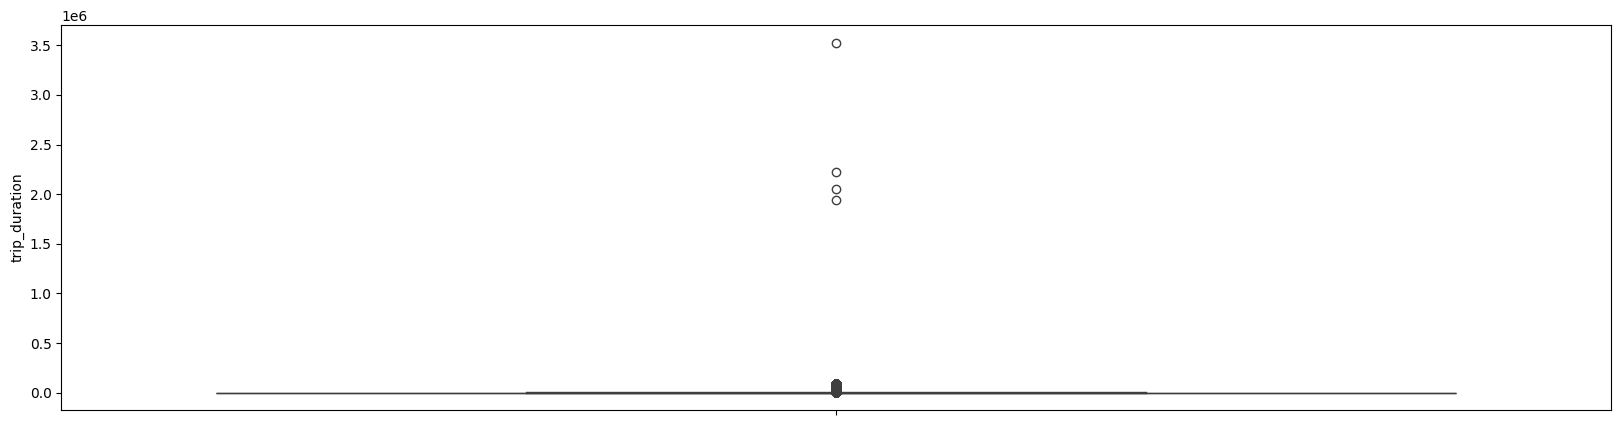

In [24]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_duration)
plt.show()

La mayoría de los viajes duran menos de 20 minutos, con una mediana de 11 minutos. Sin embargo, hay valores atípicos extremos, como un viaje de más de 40 días, lo que genera una alta variabilidad en los datos. La desviación estándar es grande, indicando que las duraciones varían bastante.

In [25]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,max(df.trip_duration),3600))).count()

<ipython-input-25-87bb8d946b7b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,max(df.trip_duration),3600))).count()


trip_duration
(1, 3601]             1446313
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
                       ...   
(3506401, 3510001]          0
(3510001, 3513601]          0
(3513601, 3517201]          0
(3517201, 3520801]          0
(3520801, 3524401]          0
Name: trip_duration, Length: 979, dtype: int64

Hay algunos viajes con más de 24 horas de duración de viaje, es decir, 86400 segundos. Lo que podría haber ocurrido los fines de semana para los viajes fuera de la estación.
La mayor parte de los viajes se completan en un intervalo de 1 hora, con un buen número de viajes que superan la hora de duración.
Echemos un vistazo a esos viajes con una gran duración, estos son valores atípicos y deben eliminarse para mantener la coherencia de los datos.

In [26]:
df[df.trip_duration > 10800]

id  vendor_id     pickup_datetime    dropoff_datetime  \
531      id3307903          2 2016-02-20 04:03:06 2016-02-21 03:33:00   
1134     id1091477          2 2016-05-07 18:36:22 2016-05-08 18:32:11   
1865     id3431345          2 2016-06-07 12:58:48 2016-06-08 12:58:00   
3442     id1487069          2 2016-02-13 00:21:49 2016-02-14 00:19:05   
4172     id3674870          2 2016-03-18 11:54:20 2016-03-19 11:34:17   
...            ...        ...                 ...                 ...   
1455097  id2798196          2 2016-03-20 03:51:36 2016-03-21 00:00:00   
1456458  id2055880          2 2016-02-08 19:11:31 2016-02-09 19:08:44   
1457207  id1910950          2 2016-06-08 16:29:12 2016-06-09 16:11:03   
1457752  id1215198          2 2016-02-02 11:31:10 2016-02-03 11:29:44   
1458076  id2332290          2 2016-04-24 00:58:34 2016-04-25 00:56:16   

         passenger_count  pickup_longitude  pickup_latitude  \
531                    3        -74.008102        40.741489   
1134                   1        -73.990242        40.750919   
1865                   6        -73.954956        40.777649   
3442                   1        -73.968590        40.799217   
4172                   1        -73.989090        40.736992   
...                  ...               ...              ...   
1455097                2        -73.969299        40.757301   
1456458                3        -73.973282        40.760792   
1457207                1        -73.958061        40.800869   
1457752                6        -73.972069        40.794220   
1458076                1        -73.990479        40.760876   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
531             -74.009956         40.714611                  0   
1134            -73.976280         40.750889                  0   
1865            -73.981033         40.743713                  0   
3442            -73.979584         40.784714                  0   
4172            -73.972336         40.751511                  0   
...                    ...               ...                ...   
1455097         -73.870277         40.709808                  0   
1456458         -73.988518         40.764210                  0   
1457207         -73.964119         40.805515                  0   
1457752         -73.961014         40.806728                  0   
1458076         -73.983025         40.764557                  0   

         trip_duration  dia_recogida  hora_recogida  dia_semana_recogida  \
531              84594            20              4                    5   
1134             86149             7             18                    5   
1865             86352             7             12                    1   
3442             86236            13              0                    5   
4172             85197            18             11                    4   
...                ...           ...            ...                  ...   
1455097          72504            20              3                    6   
1456458          86233             8             19                    0   
1457207          85311             8             16                    2   
1457752          86314             2             11                    1   
1458076          86262            24              0                    6   

         dia_llegada  hora_llegada  dia_semana_llegada  
531               21             3                   6  
1134               8            18                   6  
1865               8            12                   2  
3442              14             0                   6  
4172              19            11                   5  
...              ...           ...                 ...  
1455097           21             0                   0  
1456458            9            19                   1  
1457207            9            16                   3  
1457752            3            11                   2  
1458076           25             0   


Estos viajes duraron más de 1 dia, lo que parece poco probable por la distancia recorrida.
Todos los viajes son realizados por el proveedor 1, lo que nos indica el hecho de que este proveedor podría permitir viajes mucho más largos para las estaciones remotas.
Todos estos viajes se realizan los martes del 1er mes o los sábados del 2º mes. Puede haber alguna relación con el día de la semana, el lugar de recogida, el mes y el pasajero.
Pero fallan en nuestro propósito de predicción correcta y traen inconsistencias en el cálculo del algoritmo.


In [27]:
df = df[df.trip_duration <= 7200]


Listo, ya hemos eliminado esos datos extremos tomando viajes de maximo 3 horas.




In [28]:
import matplotlib.pyplot as plt

# Crear un histograma de la columna 'trip_duration'
plt.hist(df['trip_duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de la Duración de los Viajes')
plt.xlabel('Duración del Viaje (segundos)')
plt.ylabel('Frecuencia')
plt.show()


In [29]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

<ipython-input-29-08e729c1e4d6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')


Podemos observar que la mayoría de los viajes tardaron de 0 a 30 minutos en completarse, es decir, aproximadamente 1800 segundos. Pasemos a la siguiente característica.

ANALISIS BIVARIADO

In [30]:
df.shape

(1456391, 17)

In [31]:
df.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dia_recogida', 'hora_recogida', 'dia_semana_recogida',
       'dia_llegada', 'hora_llegada', 'dia_semana_llegada'],
      dtype='object')

In [32]:
df_info=df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456391 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   id                   1456391 non-null  object        
 1   vendor_id            1456391 non-null  int64         
 2   pickup_datetime      1456391 non-null  datetime64[ns]
 3   dropoff_datetime     1456391 non-null  datetime64[ns]
 4   passenger_count      1456391 non-null  int64         
 5   pickup_longitude     1456391 non-null  float64       
 6   pickup_latitude      1456391 non-null  float64       
 7   dropoff_longitude    1456391 non-null  float64       
 8   dropoff_latitude     1456391 non-null  float64       
 9   store_and_fwd_flag   1456391 non-null  category      
 10  trip_duration        1456391 non-null  int64         
 11  dia_recogida         1456391 non-null  int32         
 12  hora_recogida        1456391 non-null  int32         
 13  di

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo columnas numéricas
numeric_cols = df.select_dtypes(include=["number"])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


La matriz de correlación muestra las relaciones entre las variables del dataset, indicando qué tan fuertemente están asociadas entre sí. Se observa una alta correlación entre las variables relacionadas con el tiempo, como el día de recogida y día de llegada (0.99) y el día de la semana de recogida y llegada (0.99), lo cual es esperado, ya que la mayoría de los viajes ocurren dentro del mismo día.

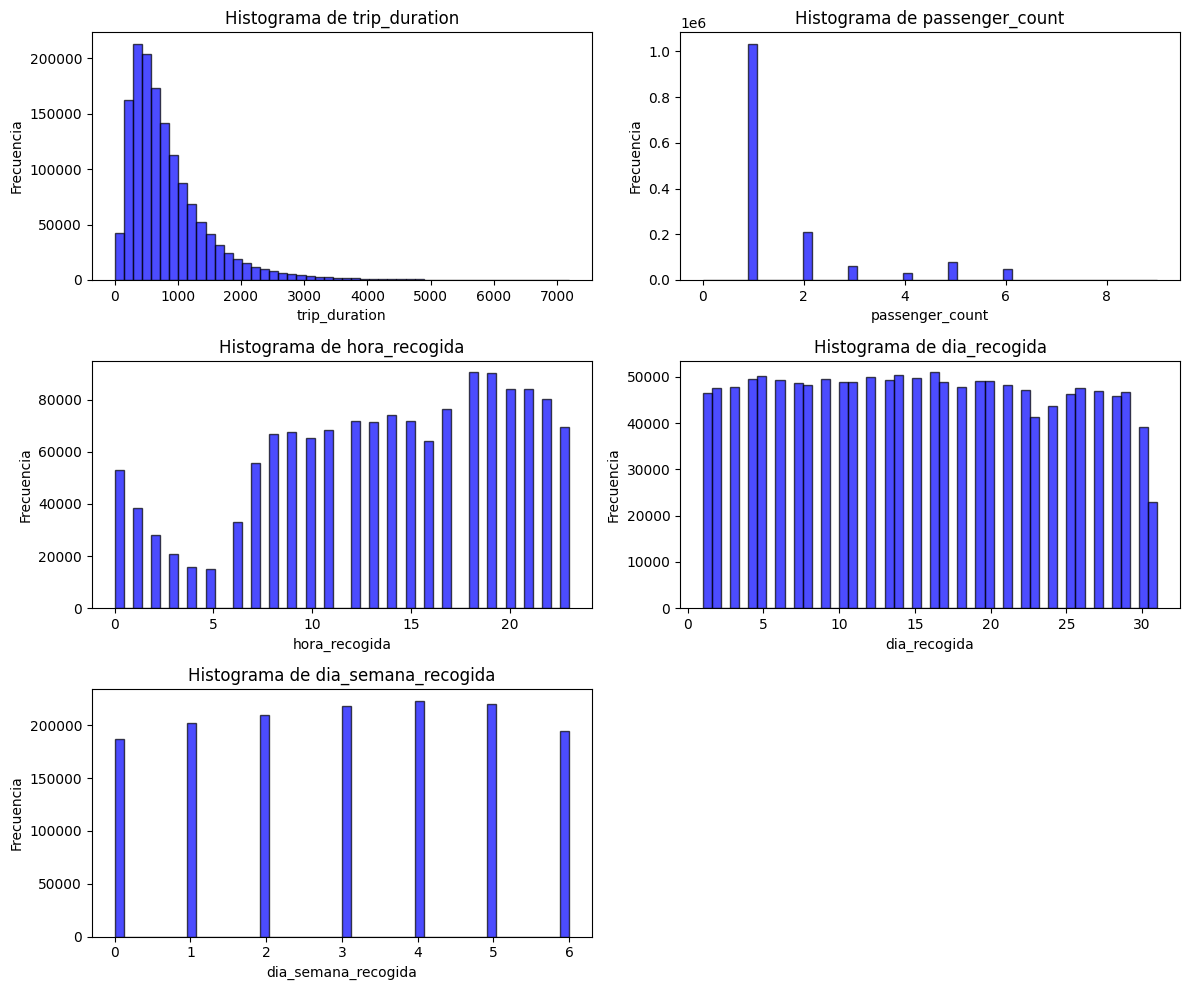

In [34]:
# Lista de características que parecen ser relevantes según la matriz de correlación
features = ['trip_duration', 'passenger_count',
            'hora_recogida', 'dia_recogida', 'dia_semana_recogida']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[feature], bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {feature}')

plt.tight_layout()
plt.show()

El análisis de los histogramas revela que la variable log_trip_duration, que es la versión transformada de la duración del viaje, sigue aproximadamente una distribución normal, lo cual es beneficioso para modelos estadísticos que asumen normalidad en la variable objetivo.

Latitud y longitud

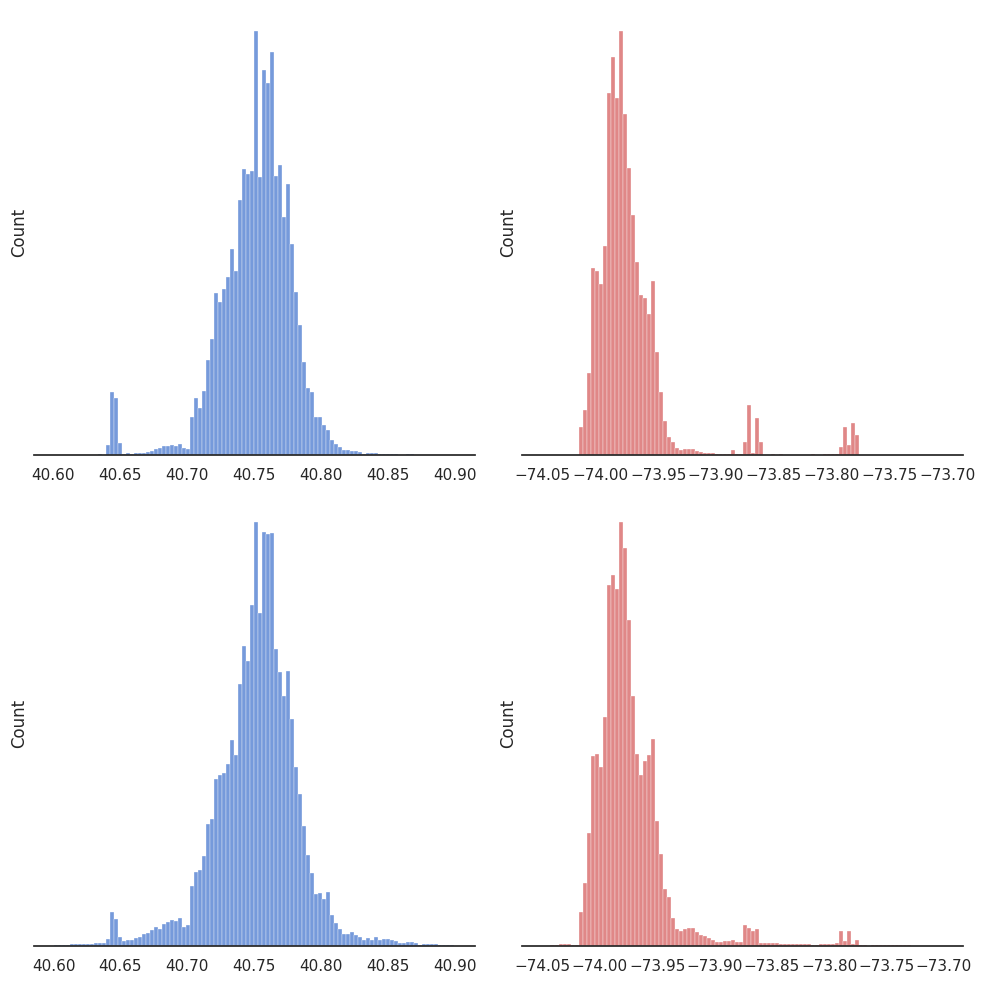

In [35]:
# Filtrar solo viajes dentro de Nueva York
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude > 40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]

# Crear una copia del DataFrame filtrado
df_filtered = df.copy()

# Configuración de estilo para los gráficos
sns.set(style="white", palette="muted", color_codes=True)

# Crear subgráficos (2x2)
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey=False)
sns.despine(left=True)

# Histogramas de coordenadas
sns.histplot(df_filtered['pickup_latitude'].values, label='pickup_latitude', color="b", bins=100, ax=axes[0, 0])
sns.histplot(df_filtered['pickup_longitude'].values, label='pickup_longitude', color="r", bins=100, ax=axes[0, 1])
sns.histplot(df_filtered['dropoff_latitude'].values, label='dropoff_latitude', color="b", bins=100, ax=axes[1, 0])
sns.histplot(df_filtered['dropoff_longitude'].values, label='dropoff_longitude', color="r", bins=100, ax=axes[1, 1])

# Ajustes finales
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Se observan picos alrededor de 40.75° de latitud y -73.95° de longitud, lo que sugiere que la mayoría de los viajes inician y terminan en ubicaciones centrales de Nueva York, posiblemente en Manhattan.

#MEJORAS DEL EDA

In [36]:
print("No. de filas en el conjunto de entrenamiento:", df.shape[0])
print("No. de columnas en el conjunto de entrenamiento:", df.shape[1])


No. de filas en el conjunto de entrenamiento: 1450163
No. de columnas en el conjunto de entrenamiento: 17


#Creación de la variable distancia en km.

In [37]:
from math import radians, sin, cos, sqrt, atan2

# Función para calcular la distancia Haversine
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])  # Convertir a radianes
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distancia en km

# Aplicar la función a los datos
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                                                               row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


Tranformando las variables para el test:

In [38]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  dia_recogida  \
0         40.765602                  0            455            14   
1         40.731152                  0            663            12   
2         40.710087                  0           2124            19   
3         40.706718                  0            429             6   
4         40.782520                  0            435            26   

   hora_recogida  dia_semana_recogida  dia_llegada  hora_llegada  \
0             17                    0           14            17   
1              0                    6           12             0   
2             11                    1           19            12   
3             19                    2            6            19   
4             13                    5           26            13   

   dia_semana_llegada  distance_km  
0                   0     1.498521  
1                   6     1.805507  
2                   1     6.385098  
3                   2     1.485498  
4                   5     1.188588

Se tomó la longitud y la latitud para tener en cuanta la distancia en km y se agregó a los conjuntos de datos.

In [39]:
df['distance_km'].describe()


count    1.450163e+06
mean     3.373767e+00
std      3.783165e+00
min      0.000000e+00
25%      1.229910e+00
50%      2.085612e+00
75%      3.839279e+00
max      3.308128e+01
Name: distance_km, dtype: float64

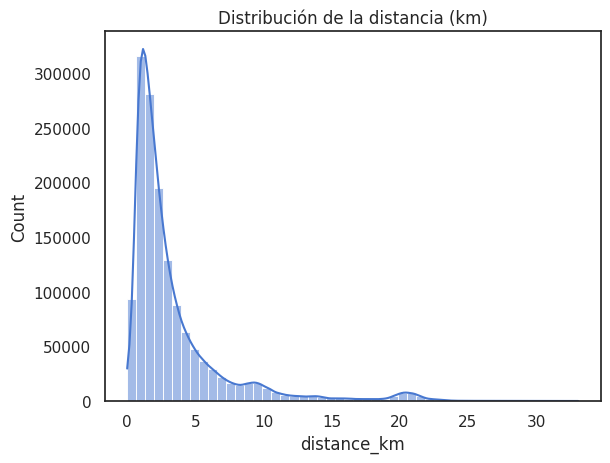

In [40]:
sns.histplot(df['distance_km'], bins=50, kde=True)
plt.title("Distribución de la distancia (km)")
plt.show()


La distribución de la variable distance_km muestra que la mayoría de los viajes son cortos, entre 0 y 5 km, con una disminución progresiva a medida que la distancia aumenta. Existen algunos picos en distancias mayores, lo que podría indicar rutas comunes o viajes atípicos. Además, hay registros con distance_km = 0, lo que sugiere posibles errores o datos inconsistentes que podrían afectar el modelo.

In [41]:
print(df[df["distance_km"] == 0].shape[0])
df = df[df["distance_km"] > 0]


5564


Los viajes con distancia igul a cero se filtraron y se eliminaron, debido a que podrian ser un error, tiempo de espera de los pasajeros y correspondian al 0.38% de nuestros datos.

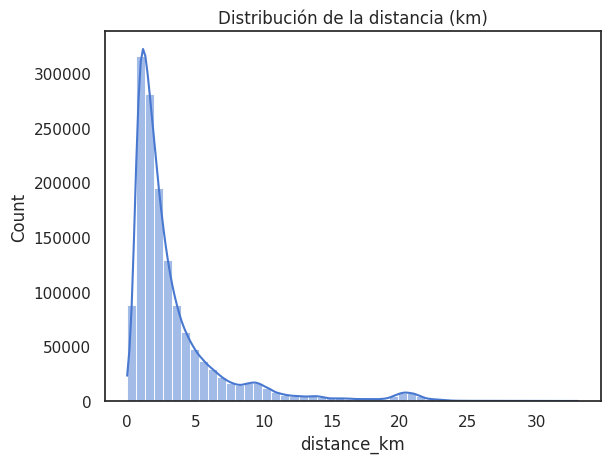

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['distance_km'], bins=50, kde=True)
plt.title("Distribución de la distancia (km)")
plt.show()

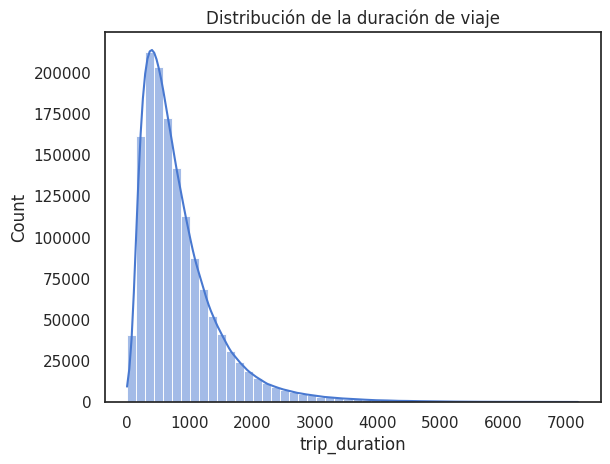

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title("Distribución de la duración de viaje")
plt.show()

Los datos registrados con distancia igual a 0 equivalen al 0.38% de nuestros datos, por esta razón fueron imputados para un mejor rendimiento en los modelos.

Se tendrá en cuenta todo lo anterior para verificar las variables que explicarian mejor nuestra variable de estudio.

La distancia tiene una distribución sesgada hacia la derecha , aplicaremos una tranformación en esta variable para entrenar mejor el modelo

In [43]:
# Transformar la variable de distancia con raíz cuadrada
df['distance_km'] = np.sqrt(df['distance_km'])



In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def displot_with_median(dataset, variable, median=True, mean=True, unit=''):
    plt.figure(figsize=(8, 5))
    sns.histplot(dataset[variable], kde=True, color='skyblue', edgecolor='black', bins=30)

    if median:
        med = dataset[variable].median()
        plt.axvline(med, color='red', linestyle='--', label=f'Median: {med:.2f}')
    if mean:
        avg = dataset[variable].mean()
        plt.axvline(avg, color='green', linestyle='--', label=f'Mean: {avg:.2f}')

    plt.title(f'Distribution of {variable}')
    plt.xlabel(f'{variable} [{unit}]')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


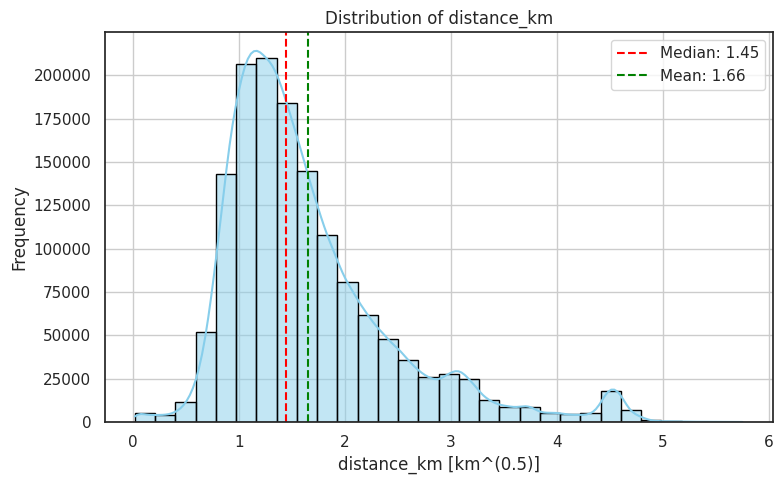

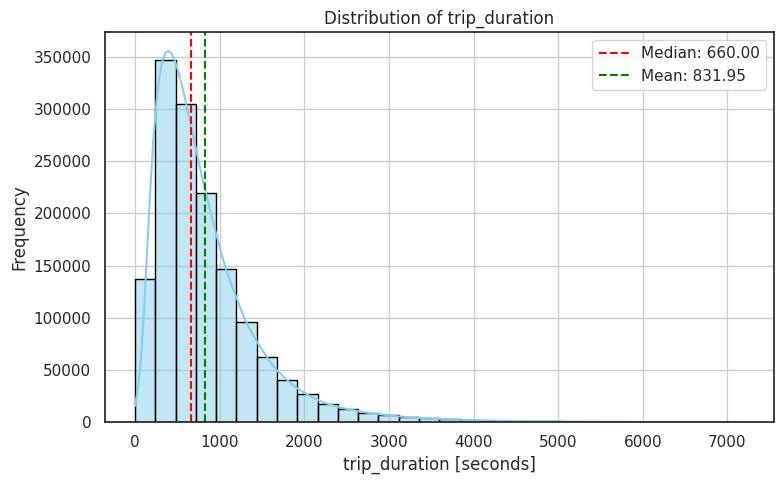

In [47]:
# Gráficas de distribución de variables originales / transformadas
for var, unit in zip(['distance_km', 'trip_duration'], ['km^(0.5)', 'seconds']):
    displot_with_median(dataset=df, variable=var, median=True, mean=True, unit=unit)


In [45]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  1444599
No. of columns:  18


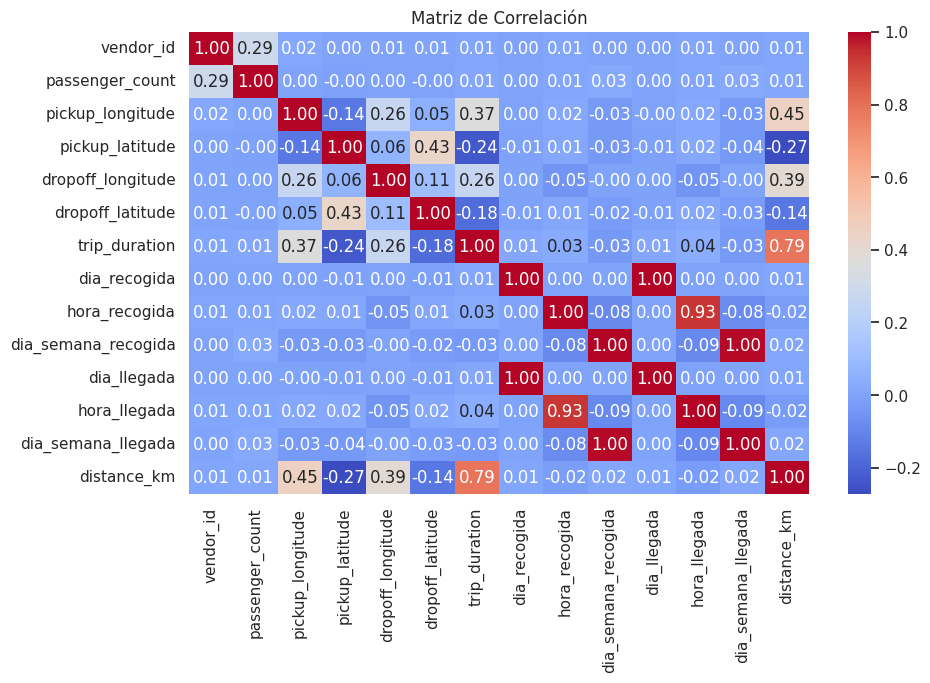

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo columnas numéricas
numeric_cols = df.select_dtypes(include=["number"])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()



In [48]:
print(df.columns)



Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dia_recogida', 'hora_recogida', 'dia_semana_recogida',
       'dia_llegada', 'hora_llegada', 'dia_semana_llegada', 'distance_km'],
      dtype='object')


In [49]:
print(df.shape)


(1444599, 18)


FEATURES

Para un mejor manejo de nuestras variables y mejores resultados en nuestros modelos para predecir el tiempo de viaje se crearan nuevas features espacio-temporales en base a la latitud, longitus, horas de salida y horas de llegada

In [50]:
from sklearn.cluster import KMeans


 Creamos variables categóricas geoespaciales agrupando ubicaciones similares mediante KMeans.
 Esto permite representar zonas de recogida y destino como clusters numéricos,
 facilitando al modelo identificar patrones espacio-temporales en los trayectos de taxi.


In [51]:
n_clusters = 20

# Pickup clustering
pickup_coords = df[['pickup_latitude', 'pickup_longitude']].to_numpy()
kmeans_pickup = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['pickup_cluster'] = kmeans_pickup.fit_predict(pickup_coords)

# Dropoff clustering
dropoff_coords = df[['dropoff_latitude', 'dropoff_longitude']].to_numpy()
kmeans_dropoff = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['dropoff_cluster'] = kmeans_dropoff.fit_predict(dropoff_coords)

In [52]:
#  Paso 1: Crear el grupo combinado pickup+dropoff
df['location_group'] = df['pickup_cluster'].astype(str) + "_" + df['dropoff_cluster'].astype(str)


In [53]:
df[['pickup_cluster', 'dropoff_cluster',"location_group"]].head()


pickup_cluster  dropoff_cluster location_group
0              12                4           12_4
1              15               10          15_10
2              12               13          12_13
3               9               13           9_13
4               7               19           7_19

pickup_cluster: identifica la zona de recogida.

dropoff_cluster: identifica la zona de destino.

In [54]:
import plotly.express as px

sample_df = df.sample(5000, random_state=42)

fig = px.scatter_mapbox(
    sample_df,
    lat="pickup_latitude",
    lon="pickup_longitude",
    color="pickup_cluster",
    zoom=10,
    mapbox_style="carto-positron",
    title="Pickup Clusters NYC"
)

fig.show()


Creamos otra feature en base a la anterior para el tiempo de viaje promedio entre las zonas divividas por los clusters.

In [55]:
# Ordenar el DataFrame por fecha y hora de recogida ascendente
df = df.sort_values('pickup_datetime').reset_index(drop=True)

# Verificar
print(df['pickup_datetime'].head())
print(df['pickup_datetime'].tail())

0   2016-01-01 00:00:17
1   2016-01-01 00:00:53
2   2016-01-01 00:01:01
3   2016-01-01 00:01:14
4   2016-01-01 00:01:20
Name: pickup_datetime, dtype: datetime64[ns]
1444594   2016-06-30 23:58:52
1444595   2016-06-30 23:59:09
1444596   2016-06-30 23:59:10
1444597   2016-06-30 23:59:37
1444598   2016-06-30 23:59:39
Name: pickup_datetime, dtype: datetime64[ns]


In [56]:
# Supongamos que la columna con la fecha y hora de recogida se llama 'pickup_datetime'
# Primero, verifica que esté en formato datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Comprobar si está ordenado ascendentemente
is_sorted = df['pickup_datetime'].is_monotonic_increasing

if is_sorted:
    print("✅ El dataset está ordenado cronológicamente por pickup_datetime.")
else:
    print("❌ El dataset NO está ordenado cronológicamente por pickup_datetime.")

# Opcional: mostrar los primeros y últimos registros para inspección rápida
print(df[['pickup_datetime']].head())
print(df[['pickup_datetime']].tail())


✅ El dataset está ordenado cronológicamente por pickup_datetime.
      pickup_datetime
0 2016-01-01 00:00:17
1 2016-01-01 00:00:53
2 2016-01-01 00:01:01
3 2016-01-01 00:01:14
4 2016-01-01 00:01:20
            pickup_datetime
1444594 2016-06-30 23:58:52
1444595 2016-06-30 23:59:09
1444596 2016-06-30 23:59:10
1444597 2016-06-30 23:59:37
1444598 2016-06-30 23:59:39


In [57]:
# Transformación cíclica para hora
df['hora_sin'] = np.sin(2 * np.pi * df['hora_recogida']/24)
df['hora_cos'] = np.cos(2 * np.pi * df['hora_recogida']/24)

# Transformación cíclica para día de la semana
df['dia_sin'] = np.sin(2 * np.pi * df['dia_semana_recogida']/7)
df['dia_cos'] = np.cos(2 * np.pi * df['dia_semana_recogida']/7)

# Feature binaria para hora pico
df['es_hora_pico'] = (
    ((df['hora_recogida'] >= 7) & (df['hora_recogida'] <= 10)) |
    ((df['hora_recogida'] >= 17) & (df['hora_recogida'] <= 20))
).astype(int)

In [58]:
#  FEATURE CRUZA_MEDIANOCHE (importante para viajes nocturnos)
df['cruza_medianoche'] = (df['dia_recogida'] != df['dia_llegada']).astype(int)


In [59]:
# Filtrar columnas relacionadas con tiempo
time_columns = [col for col in df.columns if 'hora' in col or 'dia' in col or 'semana' in col]

# Verificar si encontramos columnas
if time_columns:
    print(f"Columnas de tiempo encontradas ({len(time_columns)}):")
    print(time_columns)

    # Mostrar muestra de estas columnas
    print("\nPrimeras 5 filas:")
    display(df[time_columns].head())
else:
    print("No se encontraron columnas relacionadas con tiempo")

Columnas de tiempo encontradas (12):
['dia_recogida', 'hora_recogida', 'dia_semana_recogida', 'dia_llegada', 'hora_llegada', 'dia_semana_llegada', 'hora_sin', 'hora_cos', 'dia_sin', 'dia_cos', 'es_hora_pico', 'cruza_medianoche']

Primeras 5 filas:


dia_recogida  hora_recogida  dia_semana_recogida  dia_llegada  \
0             1              0                    4            1   
1             1              0                    4            1   
2             1              0                    4            1   
3             1              0                    4            1   
4             1              0                    4            1   

   hora_llegada  dia_semana_llegada  hora_sin  hora_cos   dia_sin   dia_cos  \
0             0                   4       0.0       1.0 -0.433884 -0.900969   
1             0                   4       0.0       1.0 -0.433884 -0.900969   
2             0                   4       0.0       1.0 -0.433884 -0.900969   
3             0                   4       0.0       1.0 -0.433884 -0.900969   
4             0                   4       0.0       1.0 -0.433884 -0.900969   

   es_hora_pico  cruza_medianoche  
0             0                 0  
1             0                 0  
2             0                 0  
3             0                 0  
4             0                 0

Teniendo en cuenta que hay viajes largos y con distancias largas, se crea la nueva variable para determinar si un viaje cruza la media noche, debido al cambio de horario, para identificar los viajes largos en la noche.

<ipython-input-63-6853b56724be>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




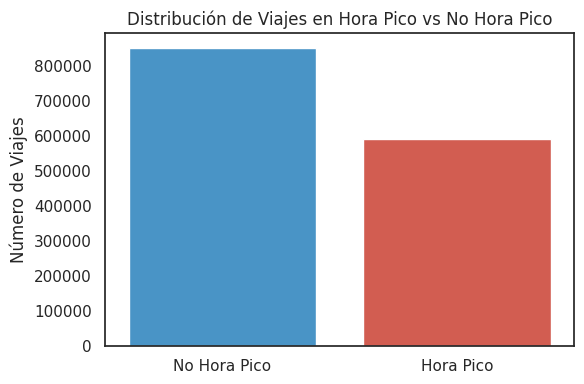

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de viajes según si es hora pico o no
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='es_hora_pico', palette=['#3498db', '#e74c3c'])
plt.xticks([0,1], ['No Hora Pico', 'Hora Pico'])
plt.title('Distribución de Viajes en Hora Pico vs No Hora Pico')
plt.xlabel('')
plt.ylabel('Número de Viajes')
plt.tight_layout()
plt.show()


In [60]:
# Verificar si hay diferencia entre recogida y llegada
print("Viajes con diferente día:", df[df['dia_recogida'] != df['dia_llegada']].shape[0])
print("Viajes con diferente hora:", df[df['hora_recogida'] != df['hora_llegada']].shape[0])

Viajes con diferente día: 14245
Viajes con diferente hora: 330873


In [61]:
df.dtypes


id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag           category
trip_duration                   int64
dia_recogida                    int32
hora_recogida                   int32
dia_semana_recogida             int32
dia_llegada                     int32
hora_llegada                    int32
dia_semana_llegada              int32
distance_km                   float64
pickup_cluster                  int32
dropoff_cluster                 int32
location_group                 object
hora_sin                      float64
hora_cos                      float64
dia_sin                       float64
dia_cos                       float64
es_hora_pico                    int64
cruza_medianoche                int64
dtype: object

##MODELOS Y RESULTADOS

*   Linear Regression
*   Ridge
*   Lasso
*   KNN
*   Random forest
*   XGboost
*   SVR

In [ ]:
# División de los datos
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from statsmodels.stats.diagnostic import acorr_ljungbox, normal_ad
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
import joblib, os, time
import numpy as np
import pandas as pd

# 🔁 Activar o desactivar log-transformación de la variable target
usar_log = True

# Variables predictoras y variable objetivo
features = [
    'passenger_count',
    'distance_km',
    'pickup_cluster',
    'dropoff_cluster',
    'hora_sin',
    'hora_cos',
    'dia_sin',
    'dia_cos',
    'es_hora_pico',
    'cruza_medianoche',
]
X = df[features]
y = df['trip_duration']

# División del conjunto (80% train, 20% test) manteniendo orden temporal
split_idx = int(0.8 * len(X))
X_train = X.iloc[:split_idx].copy()
X_test = X.iloc[split_idx:].copy()
y_train = y.iloc[:split_idx].copy()
y_test = y.iloc[split_idx:].copy()

print(f"Conjunto de entrenamiento: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Conjunto de prueba: X_test {X_test.shape}, y_test {y_test.shape}")

# Modelos y grids
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {'regressor__regressor__alpha': [0.1, 1, 10]}),
    "Lasso": (Lasso(), {'regressor__regressor__alpha': [0.01, 0.1, 1]}),
    "KNN": (KNeighborsRegressor(), {'regressor__regressor__n_neighbors': [3, 5, 7]}),
    "Random Forest": (RandomForestRegressor(random_state=42), {
        'regressor__regressor__n_estimators': [50, 100],
        'regressor__regressor__max_depth': [10, 20]
    }),
    "XGBoost": (XGBRegressor(random_state=42, n_jobs=-1), {
        'regressor__regressor__n_estimators': [50, 100],
        'regressor__regressor__max_depth': [3, 5]
    }),
    "LinearSVR": (LinearSVR(max_iter=1000), {
        'regressor__regressor__C': [0.1, 1, 10],
        'regressor__regressor__max_iter': [1000, 2000]
    }),
    "Decision Tree": (DecisionTreeRegressor(random_state=42), {
        'regressor__regressor__max_depth': [20, 25],
        'regressor__regressor__min_samples_split': [40, 60, 80]
    }),
    "LightGBM": (lgb.LGBMRegressor(random_state=42), {
        'regressor__regressor__num_leaves': [63, 127],
        'regressor__regressor__learning_rate': [0.1],
        'regressor__regressor__n_estimators': [200, 400],
        'regressor__regressor__max_depth': [15]
    }),
}

# Validación cruzada temporal
tscv = TimeSeriesSplit(n_splits=5)
results = []

for name, (model, param_grid) in models.items():
    print(f"\n🔷 {name}")

    model_filename = f"{name.lower().replace(' ', '_')}_temporal.pkl"
    model_path = f'modelos_temporal/{model_filename}'

    if os.path.exists(model_path):
        best_model = joblib.load(model_path)
        elapsed = None
    else:
        # Construcción del pipeline con o sin log-transformación
        if usar_log:
            final_regressor = TransformedTargetRegressor(
                regressor=model,
                func=np.log1p,
                inverse_func=np.expm1
            )
        else:
            final_regressor = model

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', final_regressor)
        ])

        grid = GridSearchCV(
            pipeline,
            param_grid,
            cv=tscv,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1
        )

        start = time.time()
        print(f"Entrenando {name} con validación temporal...")
        grid.fit(X_train, y_train)
        elapsed = time.time() - start

        best_model = grid.best_estimator_
        print(f"→ Mejor RMSE CV: {-grid.best_score_:.2f}")
        print(f"→ Mejor hiperparámetro: {grid.best_params_}")
        print(f"  Tiempo CPU: {elapsed:.2f} s")

        os.makedirs('modelos_temporal', exist_ok=True)
        joblib.dump(best_model, model_path)

    # Evaluación
    y_pred = best_model.predict(X_test)
    residuals = y_test - y_pred

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    ljung_pvalue = acorr_ljungbox(residuals, lags=[10], return_df=True)['lb_pvalue'].values[0]
    jb_stat, jb_pvalue = normal_ad(residuals)

    print(f"→ MAPE: {mape:.4f}")
    print(f"→ RMSE: {rmse:.2f}")
    print(f"→ R²: {r2:.4f}")
    print(f"→ Ljung-Box p: {ljung_pvalue:.4f}")
    print(f"→ Jarque-Bera p: {jb_pvalue:.4f}")

    results.append({
        'Modelo': name,
        'MAPE': mape,
        'RMSE': rmse,
        'R2': r2,
        'Ljung-Box p': ljung_pvalue,
        'Jarque-Bera p': jb_pvalue,
        'CPU Time (s)': elapsed
    })

# Tabla final
df_resultados = pd.DataFrame(results)
display(df_resultados)

print("\n📊 Comparación con validación temporal:")
print("- Respeta el orden cronológico de los datos")
print("- Evita data leakage temporal")
print("- Más representativo de la predicción real")


Conjunto de entrenamiento: X_train (1155679, 10), y_train (1155679,)
Conjunto de prueba: X_test (288920, 10), y_test (288920,)

🔷 Linear Regression
Entrenando Linear Regression con validación temporal...
→ Mejor RMSE CV: 522.29
→ Mejor hiperparámetro: {}
  Tiempo CPU: 3.18 s
→ MAPE: 0.4596
→ RMSE: 561.11
→ R²: 0.3577
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 Ridge
Entrenando Ridge con validación temporal...
→ Mejor RMSE CV: 522.26
→ Mejor hiperparámetro: {'regressor__regressor__alpha': 10}
  Tiempo CPU: 2.74 s
→ MAPE: 0.4596
→ RMSE: 561.10
→ R²: 0.3577
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 Lasso
Entrenando Lasso con validación temporal...
→ Mejor RMSE CV: 435.54
→ Mejor hiperparámetro: {'regressor__regressor__alpha': 0.1}
  Tiempo CPU: 1.75 s
→ MAPE: 0.5081
→ RMSE: 486.19
→ R²: 0.5177
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 KNN
Entrenando KNN con validación temporal...
→ Mejor RMSE CV: 341.43
→ Mejor hiperparámetro: {'regressor__regressor__n_neighbors': 7}
  

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



→ Mejor RMSE CV: 319.86
→ Mejor hiperparámetro: {'regressor__regressor__max_depth': 20, 'regressor__regressor__n_estimators': 100}
  Tiempo CPU: 1695.09 s
→ MAPE: 0.3026
→ RMSE: 348.65
→ R²: 0.7520
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 XGBoost
Entrenando XGBoost con validación temporal...
→ Mejor RMSE CV: 316.58
→ Mejor hiperparámetro: {'regressor__regressor__max_depth': 5, 'regressor__regressor__n_estimators': 100}
  Tiempo CPU: 21.48 s
→ MAPE: 0.2965
→ RMSE: 349.98
→ R²: 0.7501
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 LinearSVR
Entrenando LinearSVR con validación temporal...


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



→ Mejor RMSE CV: 521.97
→ Mejor hiperparámetro: {'regressor__regressor__C': 1, 'regressor__regressor__max_iter': 1000}
  Tiempo CPU: 1761.40 s
→ MAPE: 0.4724
→ RMSE: 552.16
→ R²: 0.3780
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 Decision Tree
Entrenando Decision Tree con validación temporal...
→ Mejor RMSE CV: 330.04
→ Mejor hiperparámetro: {'regressor__regressor__max_depth': 20, 'regressor__regressor__min_samples_split': 80}
  Tiempo CPU: 38.39 s
→ MAPE: 0.3158
→ RMSE: 357.26
→ R²: 0.7396
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 LightGBM
Entrenando LightGBM con validación temporal...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 1155679, number of used features: 10
[LightGBM] [Info] Start training from score 6.450273
→ Mejor RMSE CV: 308.72
→ Mejor hiperparámetro: {'regressor__regressor__learning_rate': 0.1, 'regressor__regressor__max_depth': 15, 'regressor__regressor__n_estimators': 400, 'regressor__regressor__num_leaves': 127}
  Tiempo CPU: 2879.71 s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



→ MAPE: 0.2924
→ RMSE: 340.79
→ R²: 0.7631
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000


Modelo      MAPE        RMSE        R2  Ljung-Box p  \
0  Linear Regression  0.459614  561.105924  0.357660          0.0   
1              Ridge  0.459614  561.095549  0.357684          0.0   
2              Lasso  0.508126  486.187967  0.517737          0.0   
3                KNN  0.337283  367.509205  0.724443          0.0   
4      Random Forest  0.302591  348.645226  0.752005          0.0   
5            XGBoost  0.296454  349.975412  0.750109          0.0   
6          LinearSVR  0.472383  552.157268  0.377985          0.0   
7      Decision Tree  0.315775  357.255515  0.739605          0.0   
8           LightGBM  0.292366  340.790879  0.763053          0.0   

   Jarque-Bera p  CPU Time (s)  
0            0.0      3.183677  
1            0.0      2.743142  
2            0.0      1.754743  
3            0.0    131.597447  
4            0.0   1695.089509  
5            0.0     21.477024  
6            0.0   1761.395885  
7            0.0     38.387941  
8            0.0   2879.711186


📊 Comparación con validación temporal:
- Respeta el orden cronológico de los datos
- Evita data leakage temporal
- Más representativo de la predicción real


#Incorporación de Clustering para Variables Geográficas

- Se creó una representación de las ubicaciones de recogida y entrega mediante clusters (pickup_cluster y dropoff_cluster) usando KMeans con 20 clusters.

- Esto permitió capturar patrones espaciales relevantes para la duración del viaje sin usar las coordenadas exactas, que pueden ser demasiado granulares.

**Creación de un Grupo Combinado para Validación**

- Se combinó pickup_cluster y dropoff_cluster en una nueva variable location_group para representar de manera única cada par de ubicaciones.

- Esta variable se usó para definir grupos en la validación cruzada, garantizando que el modelo no vea datos de la misma ubicación (pickup-dropoff) simultáneamente en entrenamiento y validación, evitando data leakage geográfico.

- Uso de GroupKFold para Validación Cruzada con Grupos de Ubicación

- En lugar de una validación aleatoria tradicional (KFold) o por tiempo (TimeSeriesSplit), se implementó GroupKFold usando la variable location_group.
Esto asegura que la validación sea más realista, simulando el desempeño del modelo en ubicaciones no vistas anteriormente.

- Mantenimiento de pickup_cluster y dropoff_cluster como Features en el Modelo.Aunque se usaron para formar los grupos de validación, estas variables también se conservaron en el conjunto de features para que el modelo pueda aprovechar la información espacial en la predicción.


📊 Procesando modelo: Linear Regression


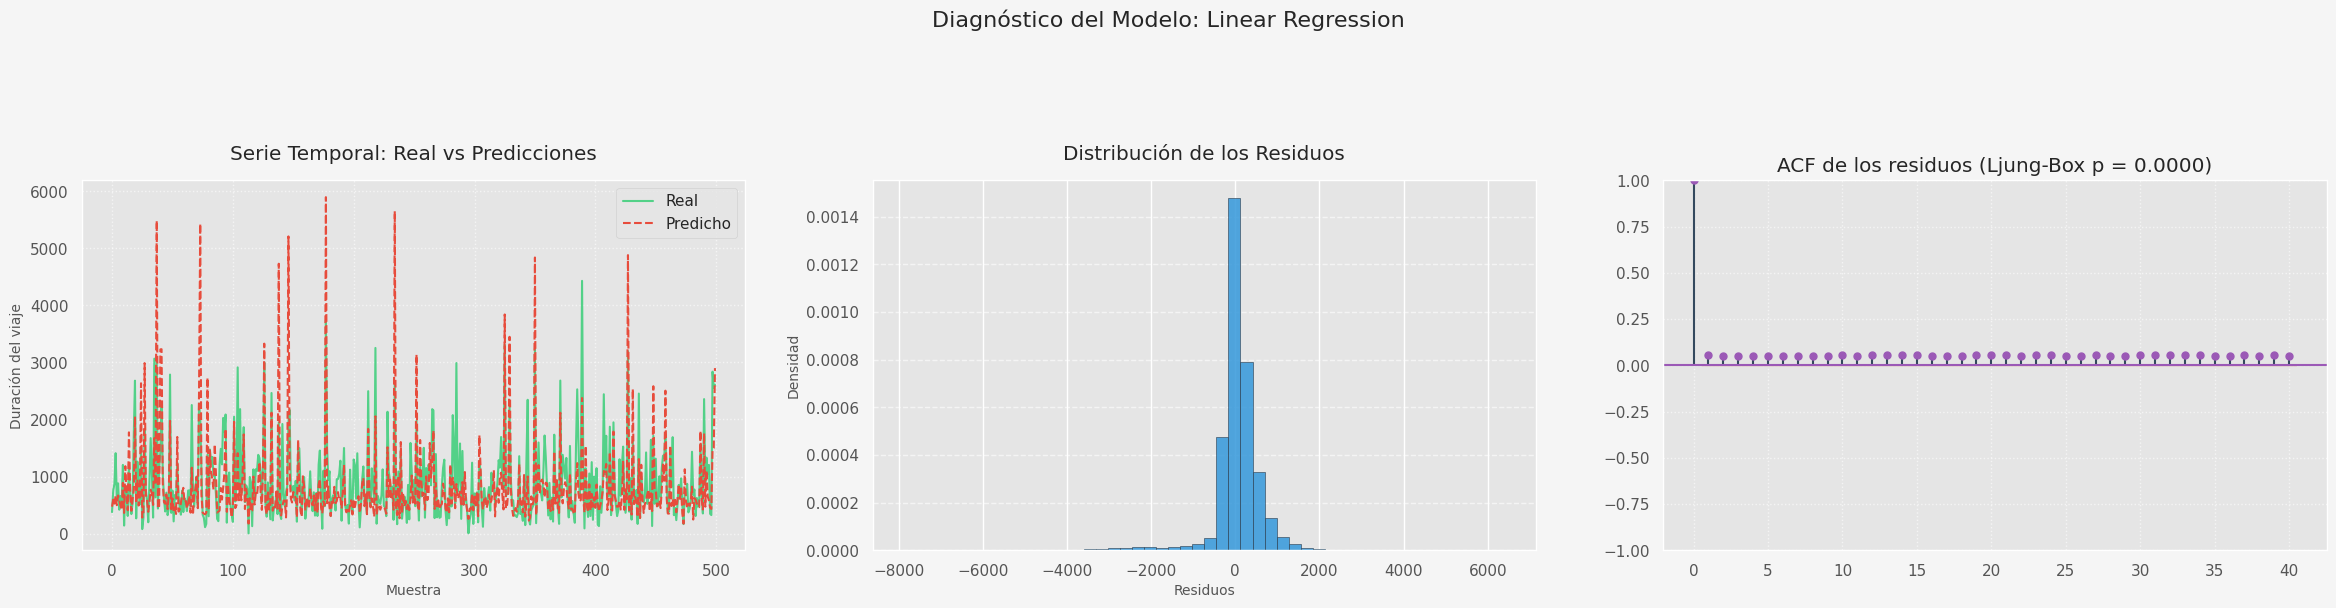

✅ Gráficas generadas para: Linear Regression
--------------------------------------------------

📊 Procesando modelo: Ridge


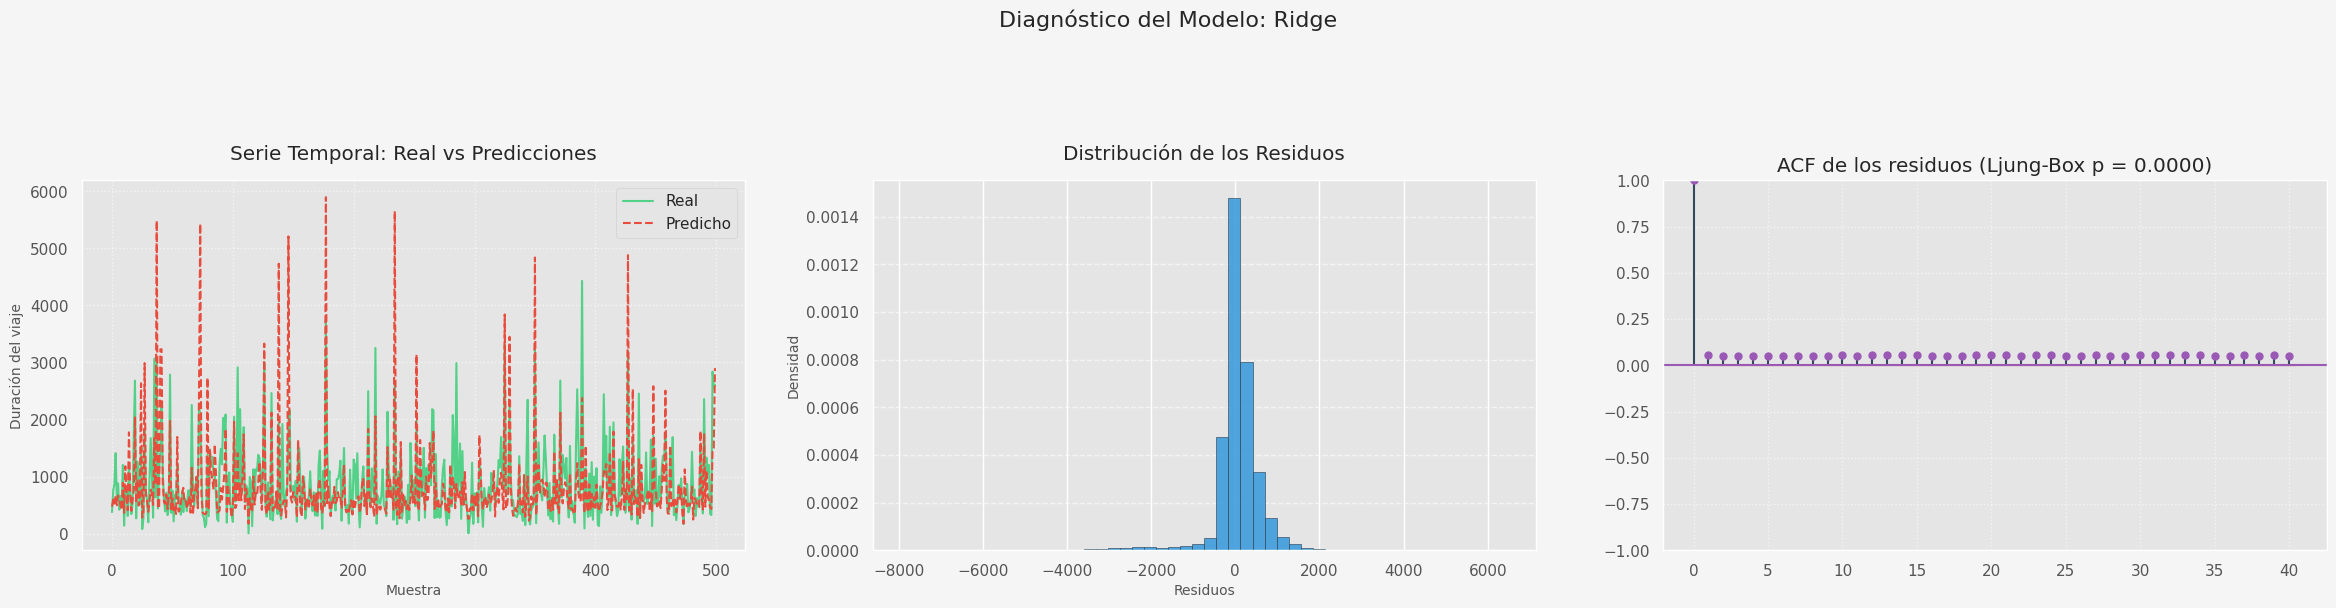

✅ Gráficas generadas para: Ridge
--------------------------------------------------

📊 Procesando modelo: Lasso


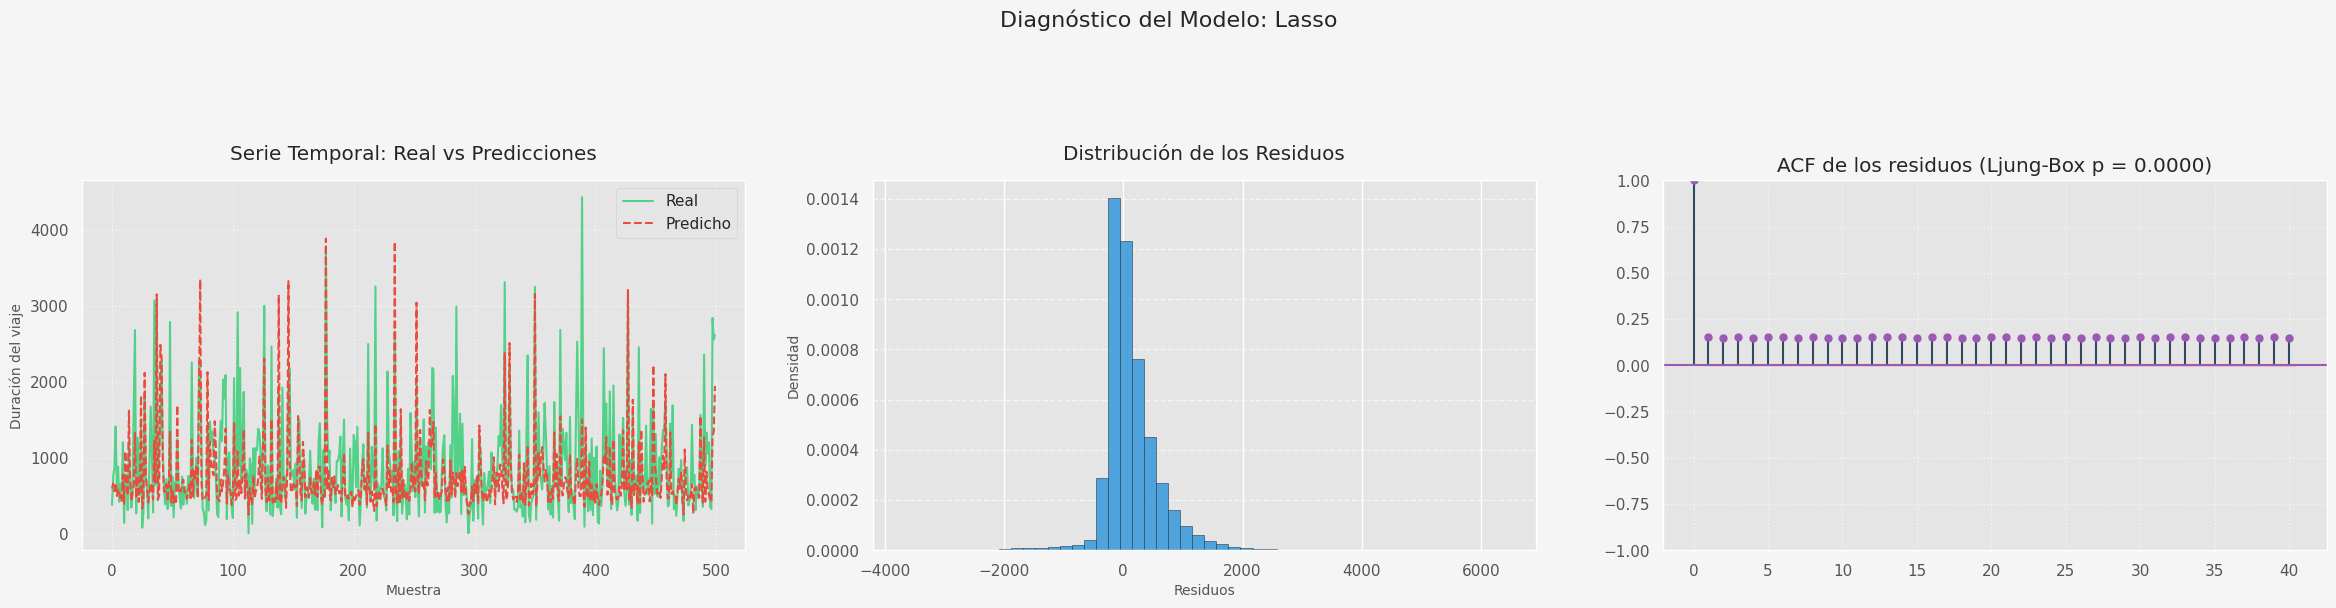

✅ Gráficas generadas para: Lasso
--------------------------------------------------

📊 Procesando modelo: KNN


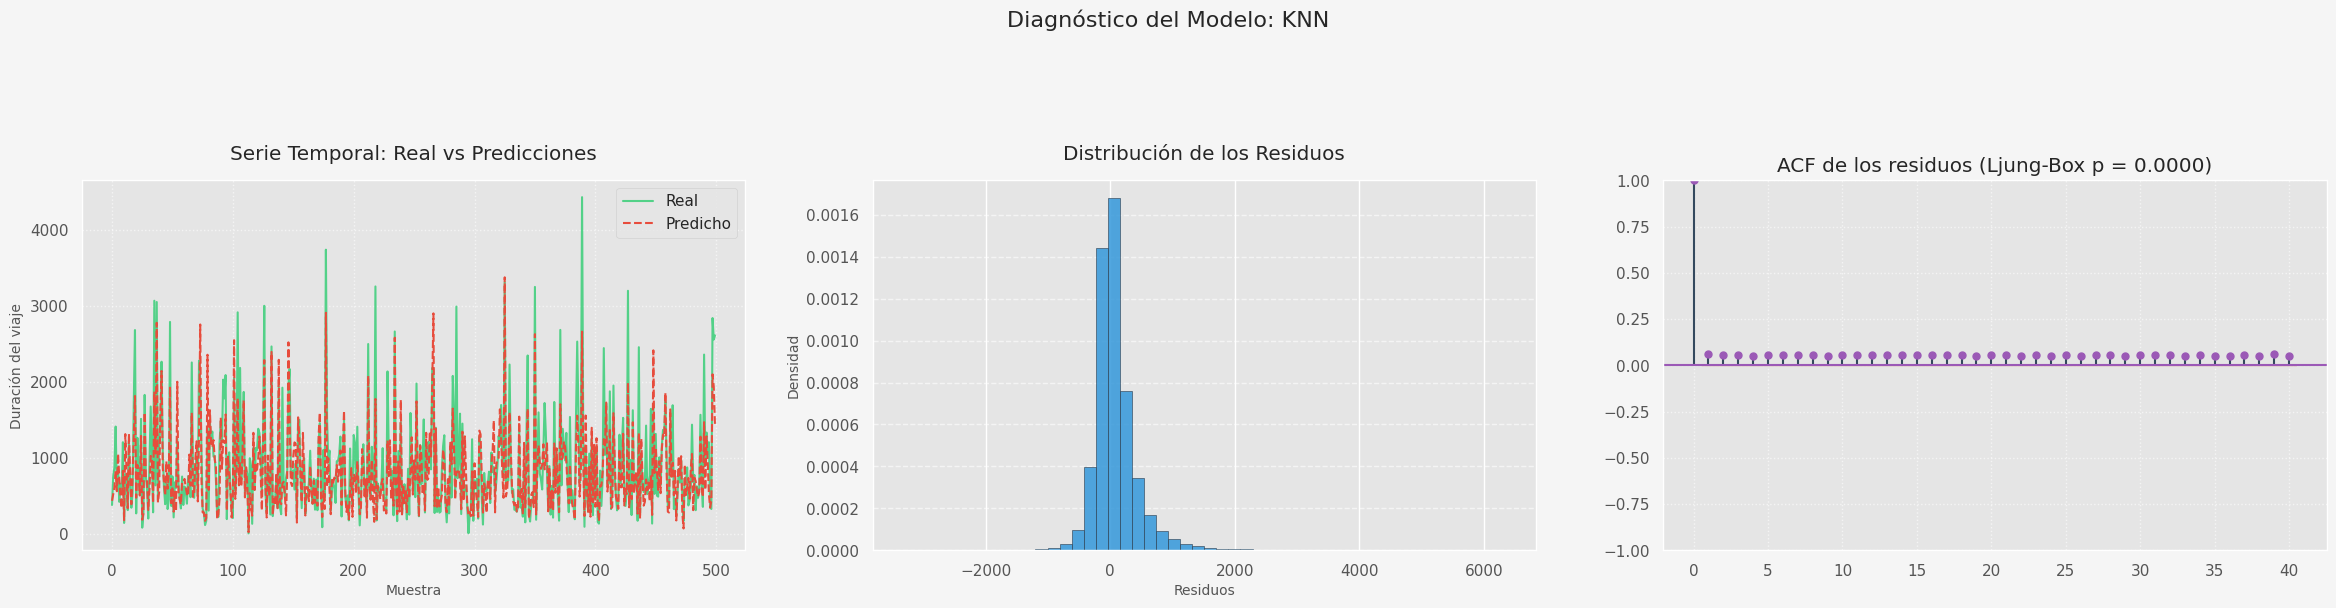

✅ Gráficas generadas para: KNN
--------------------------------------------------

📊 Procesando modelo: Random Forest


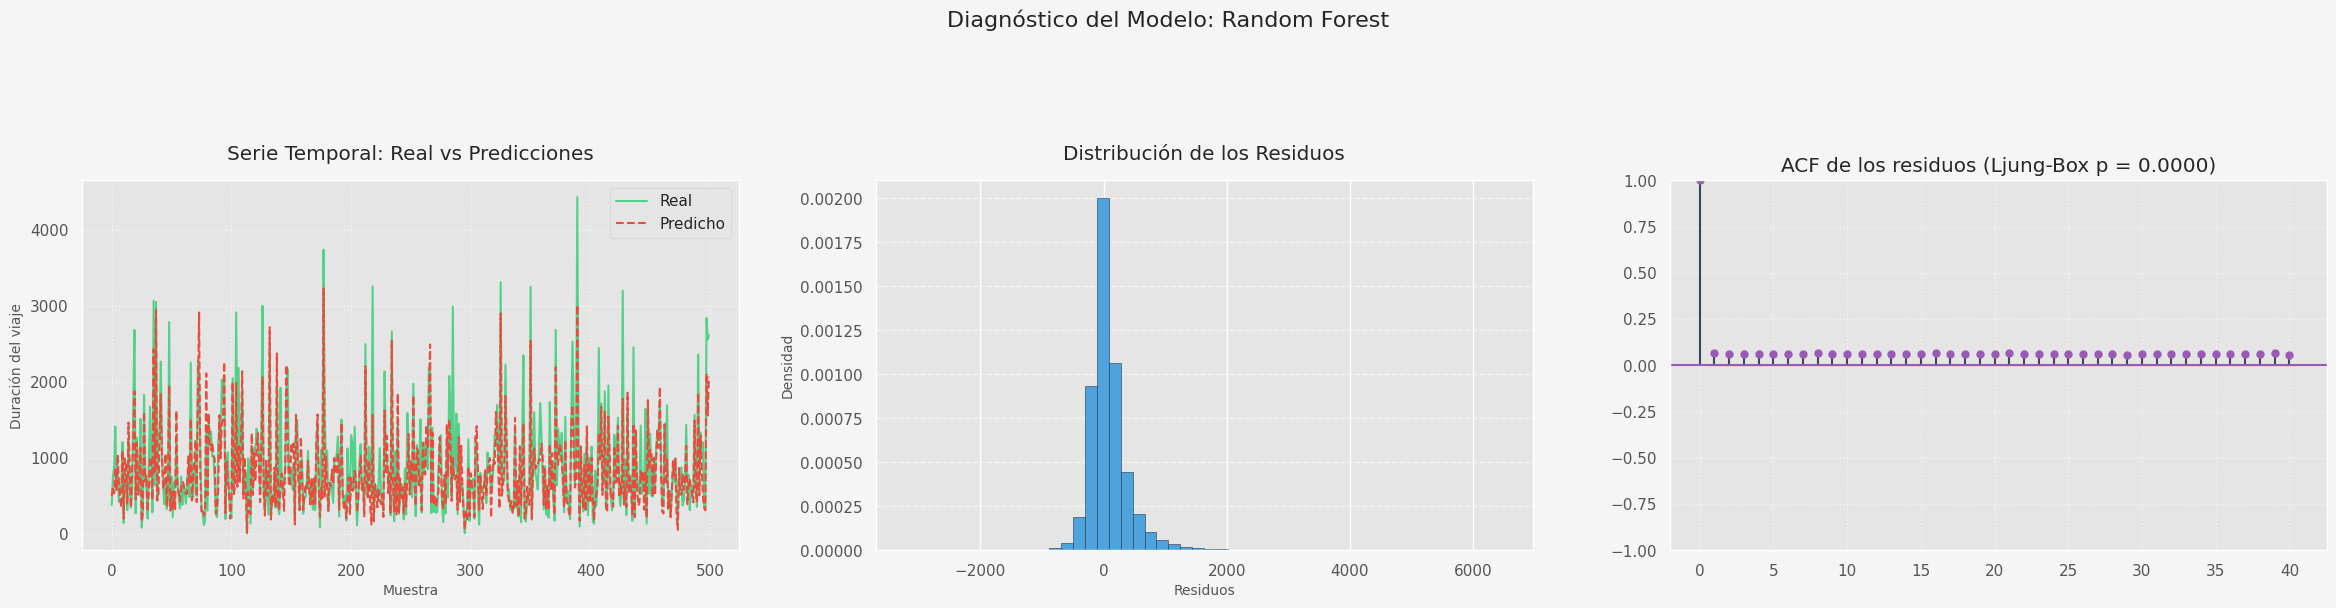

✅ Gráficas generadas para: Random Forest
--------------------------------------------------

📊 Procesando modelo: XGBoost


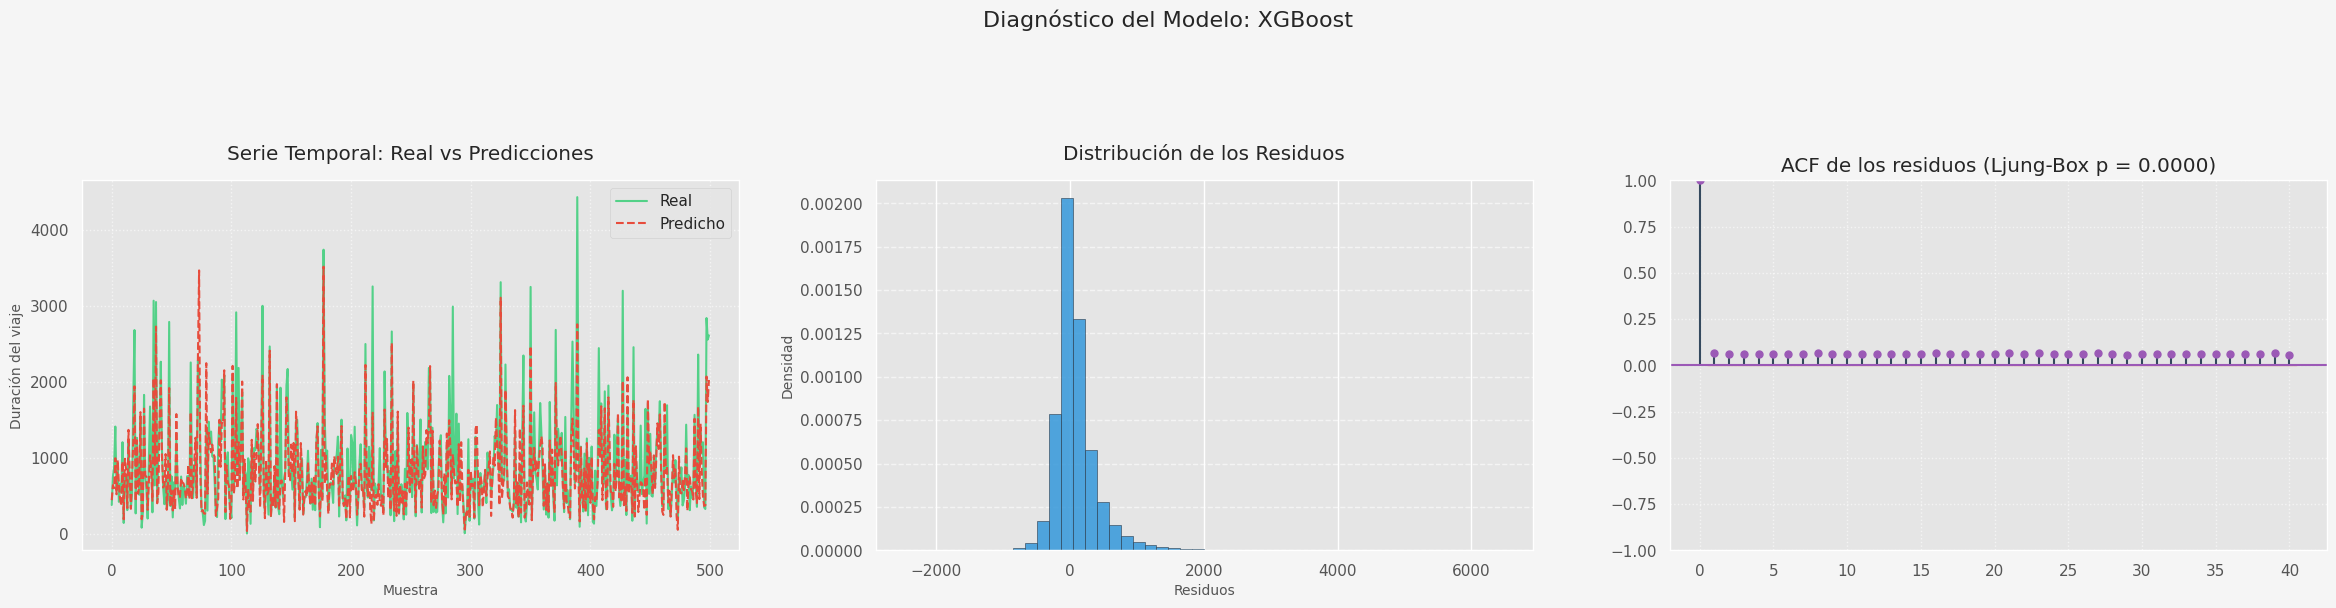

✅ Gráficas generadas para: XGBoost
--------------------------------------------------

📊 Procesando modelo: LinearSVR


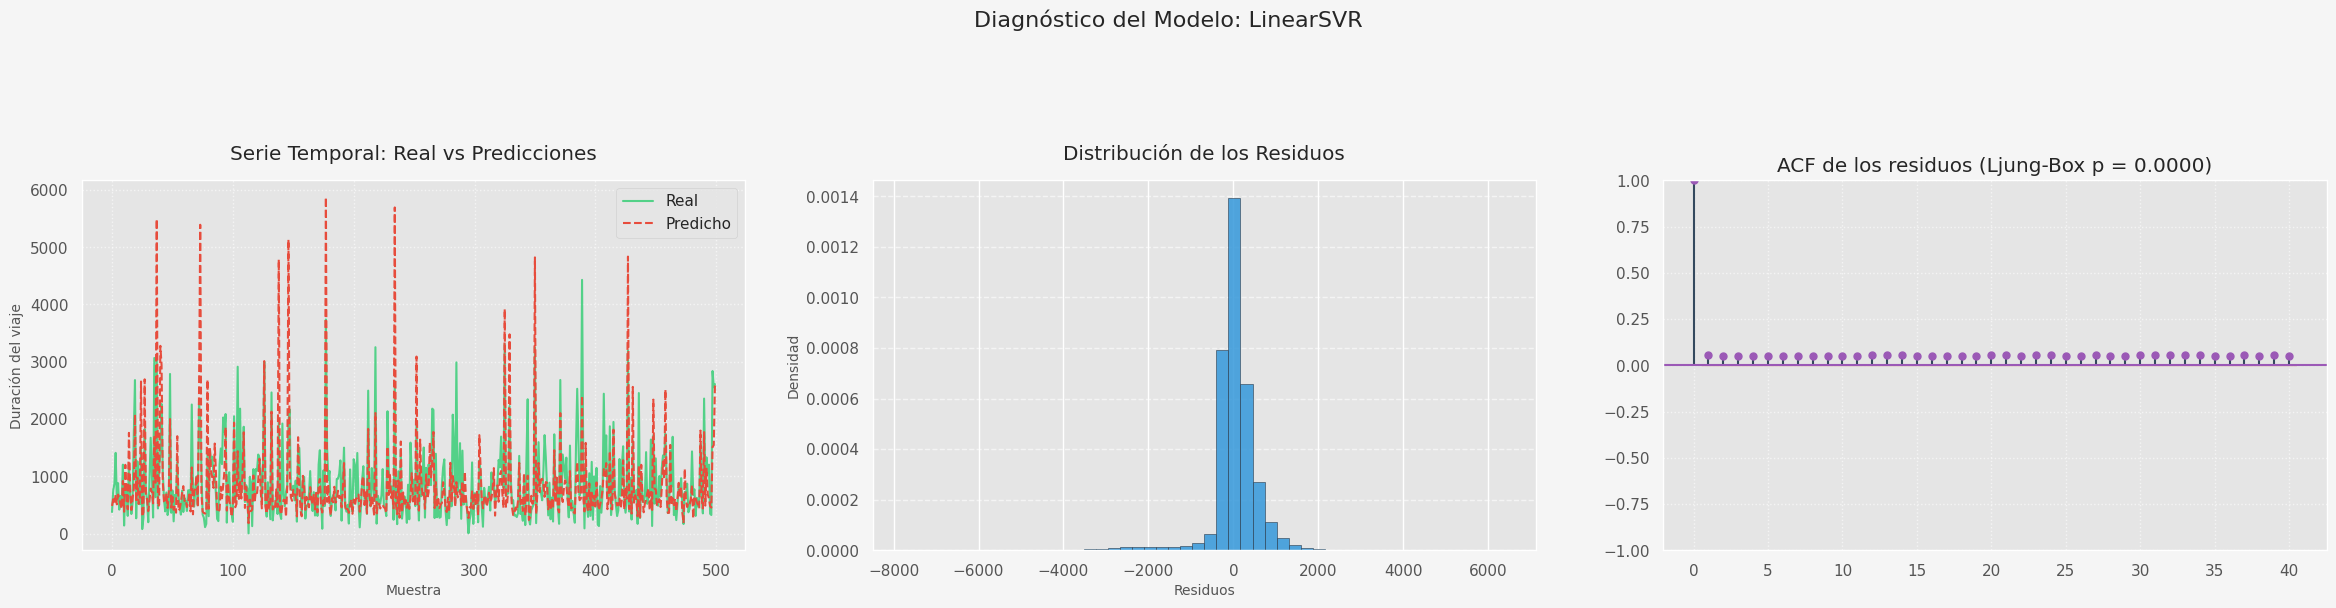

✅ Gráficas generadas para: LinearSVR
--------------------------------------------------

📊 Procesando modelo: Decision Tree


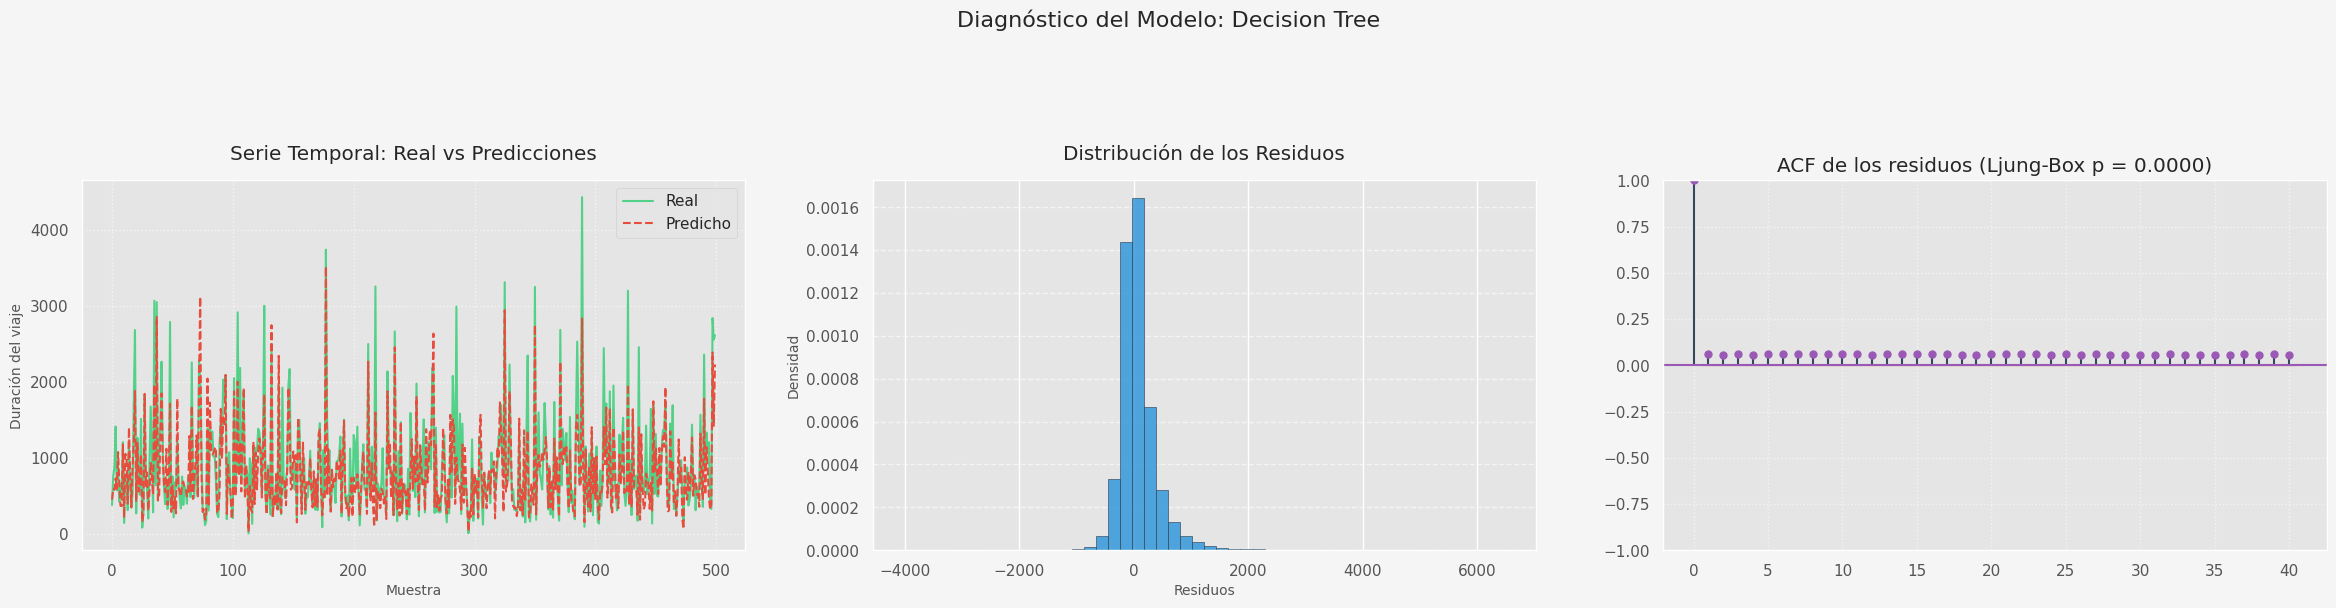

✅ Gráficas generadas para: Decision Tree
--------------------------------------------------

📊 Procesando modelo: LightGBM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



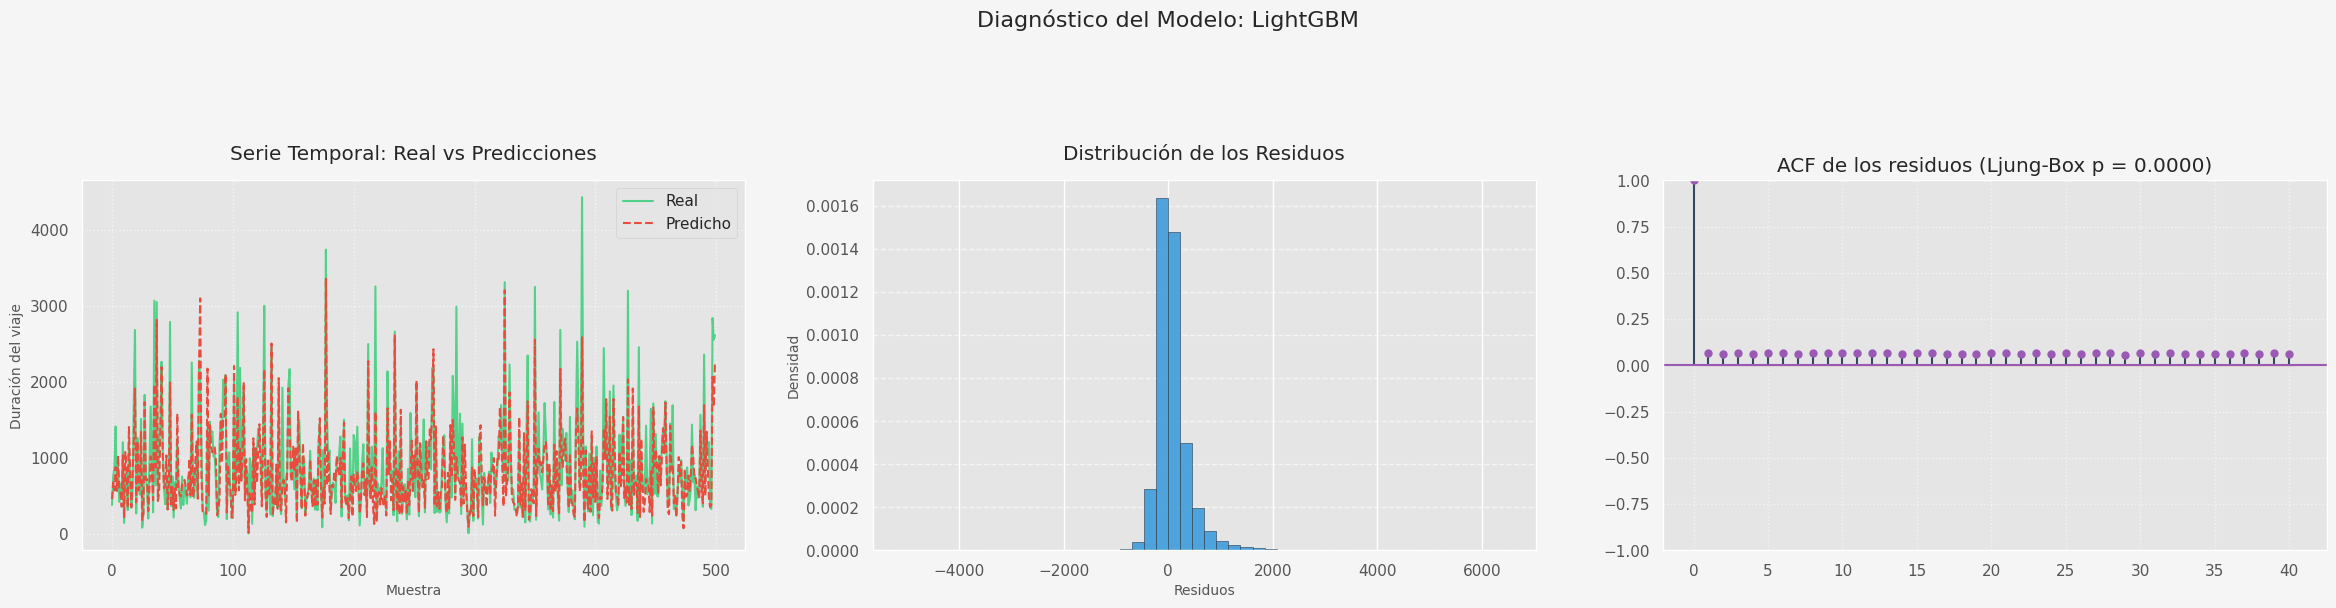

✅ Gráficas generadas para: LightGBM
--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
# Configuración global de estilos
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100
%matplotlib inline



for name in df_resultados['Modelo']:
    print(f"\n📊 Procesando modelo: {name}")

    # 1. Cargar modelo entrenado
    model_filename = f"{name.lower().replace(' ', '_')}.pkl"
    model_path = f'modelos_temporal/{name.lower().replace(" ", "_")}_temporal.pkl'
    best_model = joblib.load(model_path)

    # 2. Calcular predicciones y residuos
    y_pred_test = best_model.predict(X_test)
    residuals = y_test - y_pred_test

    # 3. Crear figura con 3 subgráficas
    fig = plt.figure(figsize=(24, 6), facecolor='#f5f5f5')  # Fondo claro
    fig.suptitle(f'Diagnóstico del Modelo: {name}', fontsize=16, y=1.05)

    # ----------------------------------------------------------
    # Gráfica 1: Comparación real vs predicho
    # ----------------------------------------------------------
    ax1 = plt.subplot(1, 3, 1)
    sample_size = min(500, len(y_test))
    sample_indices = np.linspace(0, len(y_test)-1, sample_size, dtype=int)

    ax1.plot(y_test.iloc[sample_indices].values,
            color='#2ecc71',
            label='Real',
            linewidth=1.5,
            alpha=0.8)

    ax1.plot(y_pred_test[sample_indices],
            color='#e74c3c',
            linestyle='--',
            label='Predicho',
            linewidth=1.5)

    ax1.set_xlabel('Muestra', fontsize=10)
    ax1.set_ylabel('Duración del viaje', fontsize=10)
    ax1.legend(loc='upper right')
    ax1.grid(True, linestyle=':', alpha=0.6)
    ax1.set_title('Serie Temporal: Real vs Predicciones', pad=15)

    # ----------------------------------------------------------
    # Gráfica 2: Histograma de residuos
    # ----------------------------------------------------------
    ax2 = plt.subplot(1, 3, 2)
    n_bins = min(50, len(residuals)//10)  # Bins adaptativos
    ax2.hist(residuals,
            bins=n_bins,
            color='#3498db',
            edgecolor='#2c3e50',
            density=True,  # Para superponer PDFs después
            alpha=0.85)

    ax2.set_xlabel('Residuos', fontsize=10)
    ax2.set_ylabel('Densidad', fontsize=10)
    ax2.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax2.set_title('Distribución de los Residuos', pad=15)

    # ----------------------------------------------------------
    # Gráfica 3: ACF de residuos
    # ----------------------------------------------------------
    ax3 = plt.subplot(1, 3, 3)
    ljung_pvalue = acorr_ljungbox(residuals, lags=[10], return_df=True)['lb_pvalue'].values[0]

    # Plot ACF con el nuevo formato de título
    plot_acf(residuals,
            lags=40,
            ax=ax3,
            title=f'ACF de los residuos (Ljung-Box p = {ljung_pvalue:.4f})',
            color='#9b59b6',
            vlines_kwargs={'colors': '#34495e'})

    ax3.grid(True, linestyle=':', alpha=0.6)

    # ----------------------------------------------------------
    # Ajustes finales
    plt.tight_layout(pad=3)  # Espaciado entre subplots
    plt.show()
    plt.close(fig)  # Liberar memoria
    print(f"✅ Gráficas generadas para: {name}\n{'-'*50}")




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



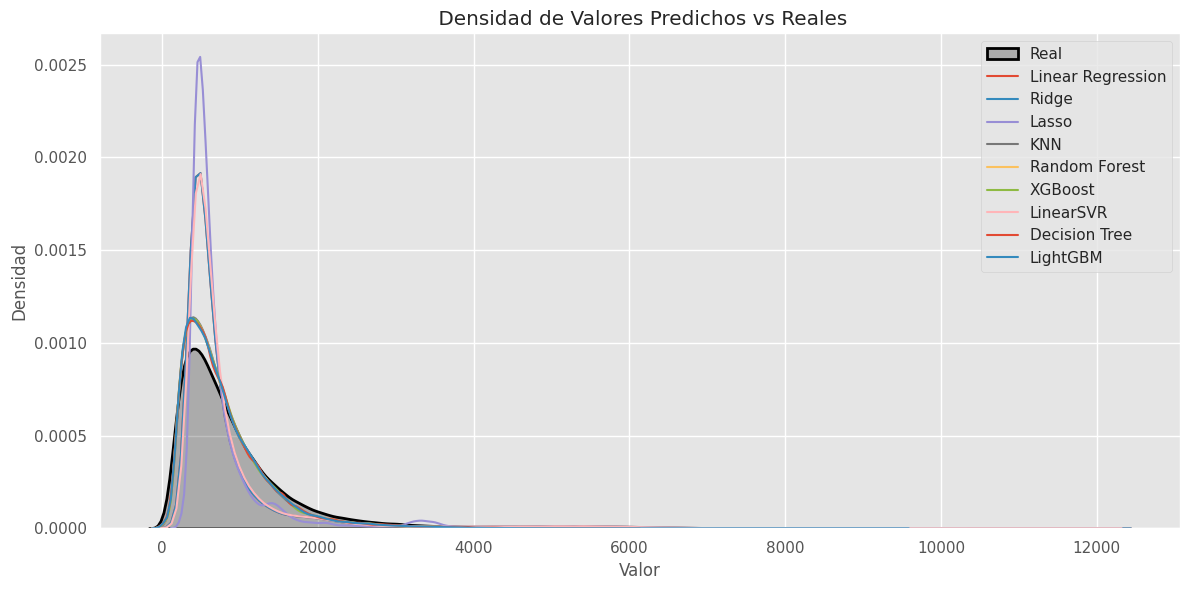

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, label='Real', fill=True, linewidth=2, color='black')  # Línea de referencia

for name in df_resultados['Modelo']:
    # Cargar el modelo
    model_path = f'modelos_temporal/{name.lower().replace(" ", "_")}_temporal.pkl'
    model = joblib.load(model_path)

    # Predecir
    y_pred = model.predict(X_test)

    # Graficar densidad
    sns.kdeplot(y_pred, label=f'{name}', fill=False, linewidth=1.5)

plt.title(' Densidad de Valores Predichos vs Reales')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Ver distribución real
print(df.groupby('cruza_medianoche')['trip_duration'].mean() / 60)

cruza_medianoche
0    13.803995
1    20.069858
Name: trip_duration, dtype: float64


##LIME


🔷 Linear Regression

🔷 Ridge

🔷 Lasso

🔷 KNN

🔷 Random Forest
Explicando predicción con LIME para Random Forest...


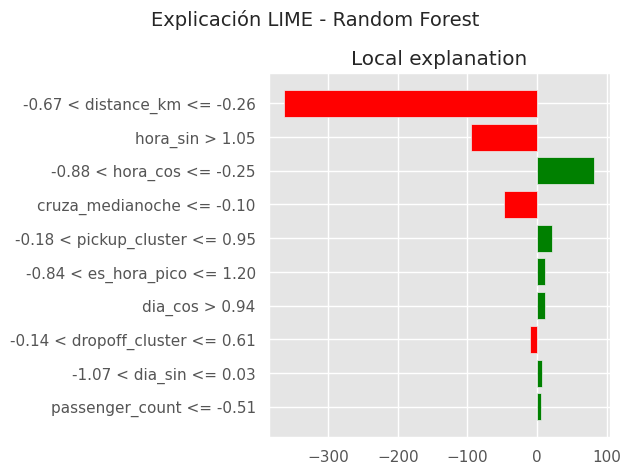


🔷 XGBoost
Explicando predicción con LIME para XGBoost...


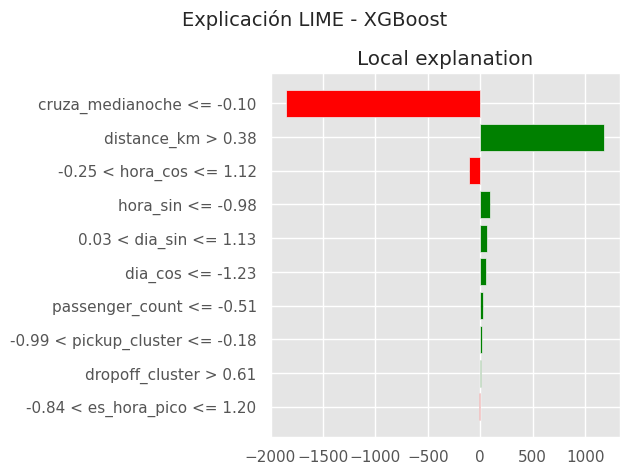


🔷 LinearSVR

🔷 Decision Tree

🔷 LightGBM


In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import joblib

# Asegúrate de tener X_train, X_test, y_train, y_test ya definidos antes

for name, (model, param_grid) in models.items():
    print(f"\n🔷 {name}")

    model_filename = f"{name.lower().replace(' ', '_')}.pkl"
    model_path = f'modelos_temporal/{name.lower().replace(" ", "_")}_temporal.pkl'


    if os.path.exists(model_path):
        best_model = joblib.load(model_path)
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])
        pipeline.fit(X_train, y_train)
        joblib.dump(pipeline, model_path)
        best_model = pipeline

    # SOLO aplicar LIME si es XGBoost o Random Forest
    if name in ["XGBoost", "Random Forest"]:
        print(f"Explicando predicción con LIME para {name}...")

        # Extraer el modelo interno
        regressor = best_model.named_steps['regressor']
        scaler = best_model.named_steps['scaler']
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Instanciar el explicador LIME
        explainer = LimeTabularExplainer(
            training_data=X_train_scaled,
            feature_names=X_train.columns.tolist(),
            mode='regression'
        )

        # Elegir una instancia aleatoria a explicar
        i = np.random.randint(0, len(X_test_scaled))
        exp = explainer.explain_instance(
            data_row=X_test_scaled[i],
            predict_fn=regressor.predict
        )

        # Mostrar la gráfica de explicación
        fig = exp.as_pyplot_figure()
        fig.suptitle(f'Explicación LIME - {name}', fontsize=14)
        plt.tight_layout()
        plt.show()




#MODELOS OPTIMIZADOS

In [ ]:
# Importar TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Modelos optimizados
models_opt = {
    "KNN (kd_tree)": (
        KNeighborsRegressor(algorithm='kd_tree'),
        {'regressor__n_neighbors': [3, 5, 7]}
    ),
    "Ridge (saga)": (
        Ridge(solver='saga'),
        {'regressor__alpha': [0.1, 1, 10]}
    ),
    "Lasso": (
        Lasso(),
        {'regressor__alpha': [0.01, 0.1, 1]}
    ),
    "XGBoost (hist)": (
        XGBRegressor(tree_method='hist', eval_metric='rmse', n_jobs=-1),
        {'regressor__n_estimators': [50, 100], 'regressor__max_depth': [3, 5]}
    ),
    "LinearSVR": (
        LinearSVR(max_iter=1000),
        {'regressor__C': [0.1, 1, 10], 'regressor__max_iter': [1000, 2000]}
    ),
}

# Usar TimeSeriesSplit para datos temporales
tscv = TimeSeriesSplit(n_splits=5)
results_opt = []

for name, (model, param_grid) in models_opt.items():
    print(f"\n🔷 {name}")

    model_filename = f"{name.lower().replace(' ', '_').replace('(', '').replace(')', '')}.pkl"
    model_path = f'modelos_temporal/{name.lower().replace(" ", "_")}_temporal.pkl'

    if os.path.exists(model_path):
        best_model = joblib.load(model_path)
        elapsed = None
    else:
        # Pipeline para modelos que no son RBF-RFF + Ridge
        if name != "RBF-RFF + Ridge":
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', model)
            ])
        else:
            pipeline = model

        grid = GridSearchCV(
            pipeline,
            param_grid,
            cv=tscv,  # Cambiado a TimeSeriesSplit
            scoring='neg_root_mean_squared_error',
            n_jobs=-1
        )

        start = time.time()
        grid.fit(X_train, y_train)
        elapsed = time.time() - start

        best_model = grid.best_estimator_
        print(f"→ Mejor RMSE CV: {-grid.best_score_:.2f}")
        print(f"→ Mejor hiperparámetro: {grid.best_params_}")
        print(f" Tiempo CPU: {elapsed:.2f} s")

        os.makedirs('modelos_opt', exist_ok=True)
        joblib.dump(best_model, model_path)

    # Evaluación sobre test set
    y_pred = best_model.predict(X_test)
    residuals = y_test - y_pred

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    ljung_pvalue = acorr_ljungbox(residuals, lags=[10], return_df=True)['lb_pvalue'].values[0]
    jb_stat, jb_pvalue = normal_ad(residuals)

    print(f"→ MAPE: {mape:.4f}")
    print(f"→ RMSE: {rmse:.2f}")
    print(f"→ R²: {r2:.4f}")
    print(f"→ Ljung-Box p: {ljung_pvalue:.4f}")
    print(f"→ Jarque-Bera p: {jb_pvalue:.4f}")

    results_opt.append({
        'Modelo Optimizado': name,
        'MAPE': mape,
        'RMSE': rmse,
        'R2': r2,
        'Ljung-Box p': ljung_pvalue,
        'Jarque-Bera p': jb_pvalue,
        'CPU Time (s)': elapsed
    })

df_resultados_opt = pd.DataFrame(results_opt)
display(df_resultados_opt)


🔷 KNN (kd_tree)
→ Mejor RMSE CV: 337.44
→ Mejor hiperparámetro: {'regressor__n_neighbors': 7}
 Tiempo CPU: 132.29 s
→ MAPE: 0.4139
→ RMSE: 362.32
→ R²: 0.7322
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 Ridge (saga)
→ Mejor RMSE CV: 367.04
→ Mejor hiperparámetro: {'regressor__alpha': 1}
 Tiempo CPU: 30.08 s
→ MAPE: 0.4514
→ RMSE: 409.28
→ R²: 0.6582
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 Lasso
→ MAPE: 0.5081
→ RMSE: 486.19
→ R²: 0.5177
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 XGBoost (hist)
→ Mejor RMSE CV: 306.74
→ Mejor hiperparámetro: {'regressor__max_depth': 5, 'regressor__n_estimators': 100}
 Tiempo CPU: 18.36 s
→ MAPE: 0.3894
→ RMSE: 338.45
→ R²: 0.7663
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

🔷 LinearSVR
→ MAPE: 0.4724
→ RMSE: 552.16
→ R²: 0.3780
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000


Modelo Optimizado      MAPE        RMSE        R2  Ljung-Box p  \
0     KNN (kd_tree)  0.413945  362.318588  0.732172          0.0   
1      Ridge (saga)  0.451437  409.278576  0.658246          0.0   
2             Lasso  0.508126  486.187967  0.517737          0.0   
3    XGBoost (hist)  0.389357  338.450294  0.766297          0.0   
4         LinearSVR  0.472383  552.157268  0.377985          0.0   

   Jarque-Bera p  CPU Time (s)  
0            0.0    132.292595  
1            0.0     30.080170  
2            0.0           NaN  
3            0.0     18.362306  
4            0.0           NaN

#MODELO ORIGINAL

In [ ]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id0190469          2 2016-01-01 00:00:17 2016-01-01 00:14:26   
1  id1665586          1 2016-01-01 00:00:53 2016-01-01 00:22:27   
2  id1210365          2 2016-01-01 00:01:01 2016-01-01 00:07:49   
3  id3888279          1 2016-01-01 00:01:14 2016-01-01 00:05:54   
4  id0924227          1 2016-01-01 00:01:20 2016-01-01 00:13:36   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                5        -73.981743        40.719158         -73.938828   
1                1        -73.985085        40.747166         -73.958038   
2                5        -73.965279        40.801041         -73.947479   
3                1        -73.982292        40.751331         -73.991341   
4                1        -73.970108        40.759800         -73.989357   

   dropoff_latitude store_and_fwd_flag  ...  distance_km  pickup_cluster  \
0         40.829182                  0  ...     3.571641               4   
1         40.717491                  0  ...     2.002531              16   
2         40.815170                  0  ...     1.473388               7   
3         40.750340                  0  ...     0.877580              16   
4         40.742989                  0  ...     1.573078               6   

   dropoff_cluster  location_group  hora_sin  hora_cos   dia_sin   dia_cos  \
0               12            4_12       0.0       1.0 -0.433884 -0.900969   
1               18           16_18       0.0       1.0 -0.433884 -0.900969   
2                1             7_1       0.0       1.0 -0.433884 -0.900969   
3                0            16_0       0.0       1.0 -0.433884 -0.900969   
4               11            6_11       0.0       1.0 -0.433884 -0.900969   

   es_hora_pico  cruza_medianoche  
0             0                 0  
1             0                 0  
2             0                 0  
3             0                 0  
4             0                 0  

[5 rows x 27 columns]

In [ ]:
print(X_train.columns.tolist())
print(X_test.columns.tolist())


['passenger_count', 'distance_km', 'pickup_cluster', 'dropoff_cluster', 'hora_sin', 'hora_cos', 'dia_sin', 'dia_cos', 'es_hora_pico', 'cruza_medianoche']
['passenger_count', 'distance_km', 'pickup_cluster', 'dropoff_cluster', 'hora_sin', 'hora_cos', 'dia_sin', 'dia_cos', 'es_hora_pico', 'cruza_medianoche']


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from statsmodels.stats.diagnostic import acorr_ljungbox, normal_ad
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
import joblib
import os
import time

In [ ]:
from sklearn.compose import TransformedTargetRegressor
import numpy as np

# ------------------- Modelos base ---------------------
xgb = make_pipeline(StandardScaler(), XGBRegressor(n_estimators=100, max_depth=3, random_state=42, n_jobs=-1))
lgbm = make_pipeline(StandardScaler(), lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, num_leaves=63, max_depth=15, random_state=42))

# Meta-modelo
meta_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Stacking sin transformación aún
stack_model_base = StackingRegressor(
    estimators=[('xgb', xgb), ('lgbm', lgbm)],
    final_estimator=meta_model,
    passthrough=False,
    n_jobs=-1
)

# Transformación de la variable objetivo
stack_model = TransformedTargetRegressor(
    regressor=stack_model_base,
    func=np.log1p,
    inverse_func=np.expm1
)

model_path = 'modelos_temporal/stacking_xgb_lgbm_dt_LOG.pkl'


In [ ]:
# ------------------- Entrenamiento ---------------------
if os.path.exists(model_path):
    stack_model = joblib.load(model_path)
    elapsed = None
    print("✅ Modelo Stacking (con log) cargado desde disco.")
else:
    print("🚀 Entrenando modelo StackingRegressor (con log target)...")
    start = time.time()
    stack_model.fit(X_train, y_train)
    elapsed = time.time() - start
    os.makedirs('modelos_temporal', exist_ok=True)
    joblib.dump(stack_model, model_path)
    print(f"✅ Modelo guardado en: {model_path}")
    print(f"⏱️ Tiempo CPU: {elapsed:.2f} s")

🚀 Entrenando modelo StackingRegressor (con log target)...
✅ Modelo guardado en: modelos_temporal/stacking_xgb_lgbm_dt_LOG.pkl
⏱️ Tiempo CPU: 55.62 s


In [ ]:
# ------------------- Métricas ---------------------

def calcular_metricas(y_true, y_pred, nombre=""):
    residuals = y_true - y_pred
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    ljung_pvalue = acorr_ljungbox(residuals, lags=[10], return_df=True)['lb_pvalue'].values[0]
    jb_stat, jb_pvalue = normal_ad(residuals)

    print(f"\n📊 Métricas {nombre}")
    print(f"→ MAPE: {mape:.4f}")
    print(f"→ RMSE: {rmse:.2f}")
    print(f"→ R²: {r2:.4f}")
    print(f"→ Ljung-Box p: {ljung_pvalue:.4f}")
    print(f"→ Jarque-Bera p: {jb_pvalue:.4f}")

    return {
        'MAPE': mape,
        'RMSE': rmse,
        'R2': r2,
        'Ljung-Box p': ljung_pvalue,
        'Jarque-Bera p': jb_pvalue
    }

# ------------------- Predicciones ---------------------
y_pred_train = stack_model.predict(X_train)
y_pred_test = stack_model.predict(X_test)

# ------------------- Resultados ---------------------
resultados_train = calcular_metricas(y_train, y_pred_train, "Entrenamiento")
resultados_test = calcular_metricas(y_test, y_pred_test, "Prueba")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




📊 Métricas Entrenamiento
→ MAPE: 0.2625
→ RMSE: 288.56
→ R²: 0.7914
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000

📊 Métricas Prueba
→ MAPE: 0.2711
→ RMSE: 331.80
→ R²: 0.7754
→ Ljung-Box p: 0.0000
→ Jarque-Bera p: 0.0000


In [ ]:
# ------------------- DataFrame resumen ---------------------
df_resultados = pd.DataFrame([{
    'Modelo': 'Stacking (XGB + LGBM → Árbol)',
    'MAPE Train': resultados_train['MAPE'],
    'RMSE Train': resultados_train['RMSE'],
    'R2 Train': resultados_train['R2'],
    'Ljung-Box Train p': resultados_train['Ljung-Box p'],
    'Jarque-Bera Train p': resultados_train['Jarque-Bera p'],
    'MAPE Test': resultados_test['MAPE'],
    'RMSE Test': resultados_test['RMSE'],
    'R2 Test': resultados_test['R2'],
    'Ljung-Box Test p': resultados_test['Ljung-Box p'],
    'Jarque-Bera Test p': resultados_test['Jarque-Bera p'],
    'CPU Time (s)': elapsed
}])

display(df_resultados)

Modelo  MAPE Train  RMSE Train  R2 Train  \
0  Stacking (XGB + LGBM → Árbol)    0.262501  288.562461  0.791424   

   Ljung-Box Train p  Jarque-Bera Train p  MAPE Test  RMSE Test   R2 Test  \
0                0.0                  0.0   0.271061   331.7954  0.775397   

   Ljung-Box Test p  Jarque-Bera Test p  CPU Time (s)  
0               0.0                 0.0      55.62289

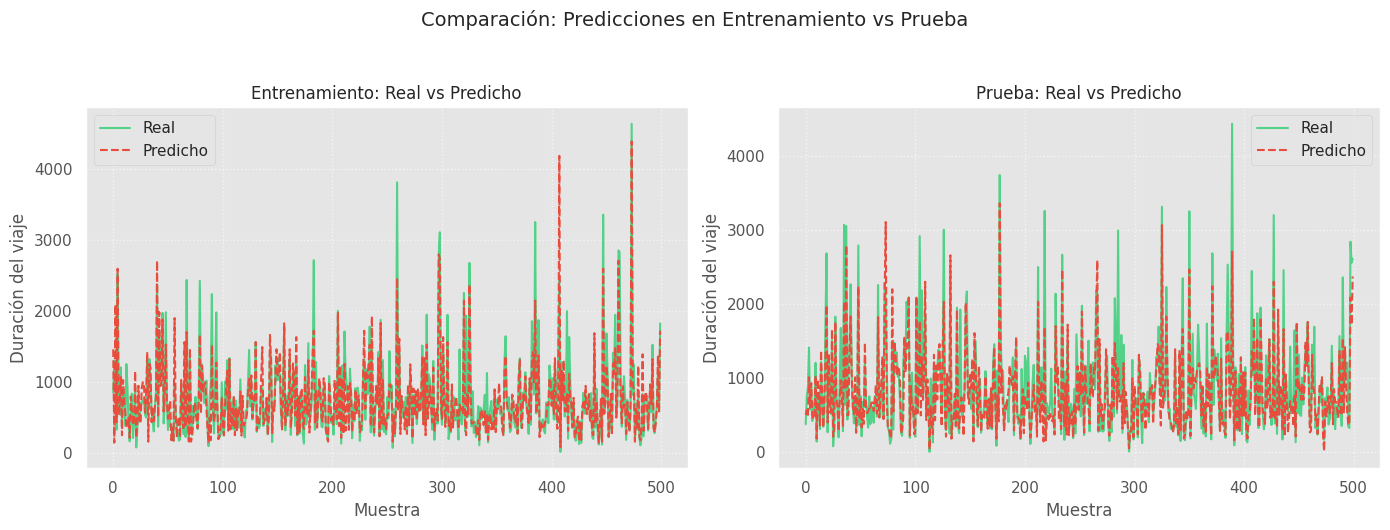

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes estas predicciones listas:
# y_pred_train = modelo.predict(X_train)
# y_pred_test = modelo.predict(X_test)

# Crear figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# ---- Subplot 1: TRAIN ----
sample_size_train = min(500, len(y_train))
indices_train = np.linspace(0, len(y_train) - 1, sample_size_train, dtype=int)

ax1.plot(y_train.iloc[indices_train].values,
         label='Real',
         color='#2ecc71',
         linewidth=1.5,
         alpha=0.8)

ax1.plot(y_pred_train[indices_train],
         label='Predicho',
         color='#e74c3c',
         linestyle='--',
         linewidth=1.5)

ax1.set_title('Entrenamiento: Real vs Predicho', fontsize=12)
ax1.set_xlabel('Muestra')
ax1.set_ylabel('Duración del viaje')
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend()

# ---- Subplot 2: TEST ----
sample_size_test = min(500, len(y_test))
indices_test = np.linspace(0, len(y_test) - 1, sample_size_test, dtype=int)

ax2.plot(y_test.iloc[indices_test].values,
         label='Real',
         color='#2ecc71',
         linewidth=1.5,
         alpha=0.8)

ax2.plot(y_pred_test[indices_test],
         label='Predicho',
         color='#e74c3c',
         linestyle='--',
         linewidth=1.5)

ax2.set_title('Prueba: Real vs Predicho', fontsize=12)
ax2.set_xlabel('Muestra')
ax2.set_ylabel('Duración del viaje')
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.legend()

# Ajustar layout
plt.suptitle('Comparación: Predicciones en Entrenamiento vs Prueba', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()



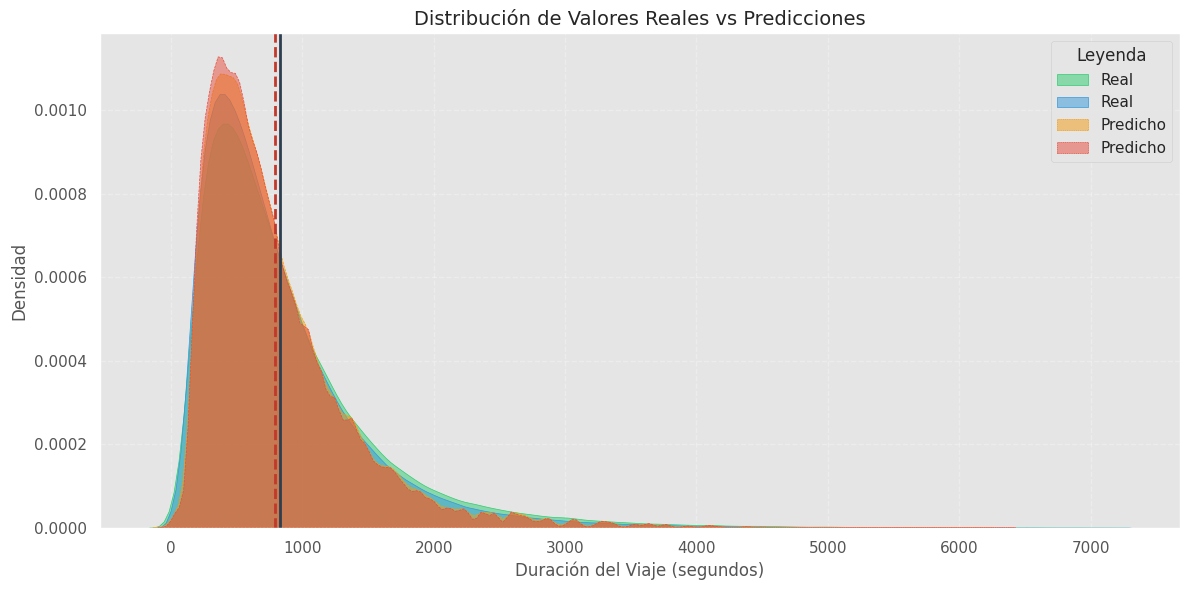

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Crear DataFrame con resultados
df_results = pd.DataFrame({
    'Real': np.concatenate([y_train, y_test]),
    'Predicho': np.concatenate([y_pred_train, y_pred_test]),
    'Conjunto': ['Entrenamiento'] * len(y_train) + ['Prueba'] * len(y_test)
})

# Crear gráfico de densidad
sns.kdeplot(data=df_results, x='Real', hue='Conjunto', fill=True,
            common_norm=False, palette=['#3498db', '#2ecc71'], alpha=0.5, label='Real')
sns.kdeplot(data=df_results, x='Predicho', hue='Conjunto', fill=True,
            common_norm=False, palette=['#e74c3c', '#f39c12'], alpha=0.5, linestyle='--', label='Predicho')

plt.title('Distribución de Valores Reales vs Predicciones', fontsize=14)
plt.xlabel('Duración del Viaje (segundos)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Leyenda', loc='upper right')

# Añadir línea vertical para la media
plt.axvline(x=np.mean(df_results['Real']), color='#2c3e50', linestyle='-', linewidth=2,
            label=f'Media Real: {np.mean(df_results["Real"]):.0f}s')
plt.axvline(x=np.mean(df_results['Predicho']), color='#c0392b', linestyle='--', linewidth=2,
            label=f'Media Predicha: {np.mean(df_results["Predicho"]):.0f}s')

plt.tight_layout()
plt.show()

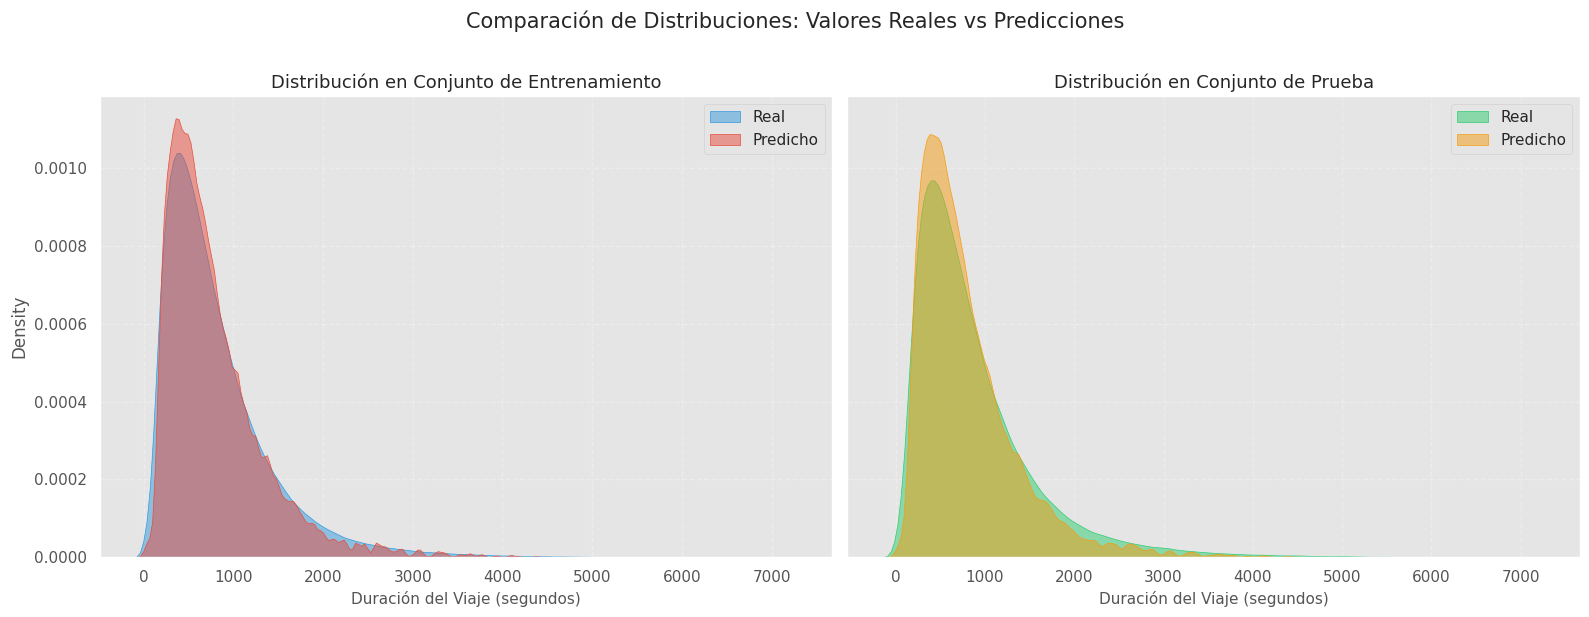

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Subplot 1: Entrenamiento
sns.kdeplot(data=y_train, ax=ax1, color='#3498db', fill=True, alpha=0.5, label='Real')
sns.kdeplot(data=y_pred_train, ax=ax1, color='#e74c3c', fill=True, alpha=0.5, label='Predicho')
ax1.set_title('Distribución en Conjunto de Entrenamiento', fontsize=13)
ax1.set_xlabel('Duración del Viaje (segundos)', fontsize=11)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend()



# Subplot 2: Prueba
sns.kdeplot(data=y_test, ax=ax2, color='#2ecc71', fill=True, alpha=0.5, label='Real')
sns.kdeplot(data=y_pred_test, ax=ax2, color='#f39c12', fill=True, alpha=0.5, label='Predicho')
ax2.set_title('Distribución en Conjunto de Prueba', fontsize=13)
ax2.set_xlabel('Duración del Viaje (segundos)', fontsize=11)
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.legend()


# Título general
plt.suptitle('Comparación de Distribuciones: Valores Reales vs Predicciones', fontsize=15, y=1.02)
plt.tight_layout()
plt.show()

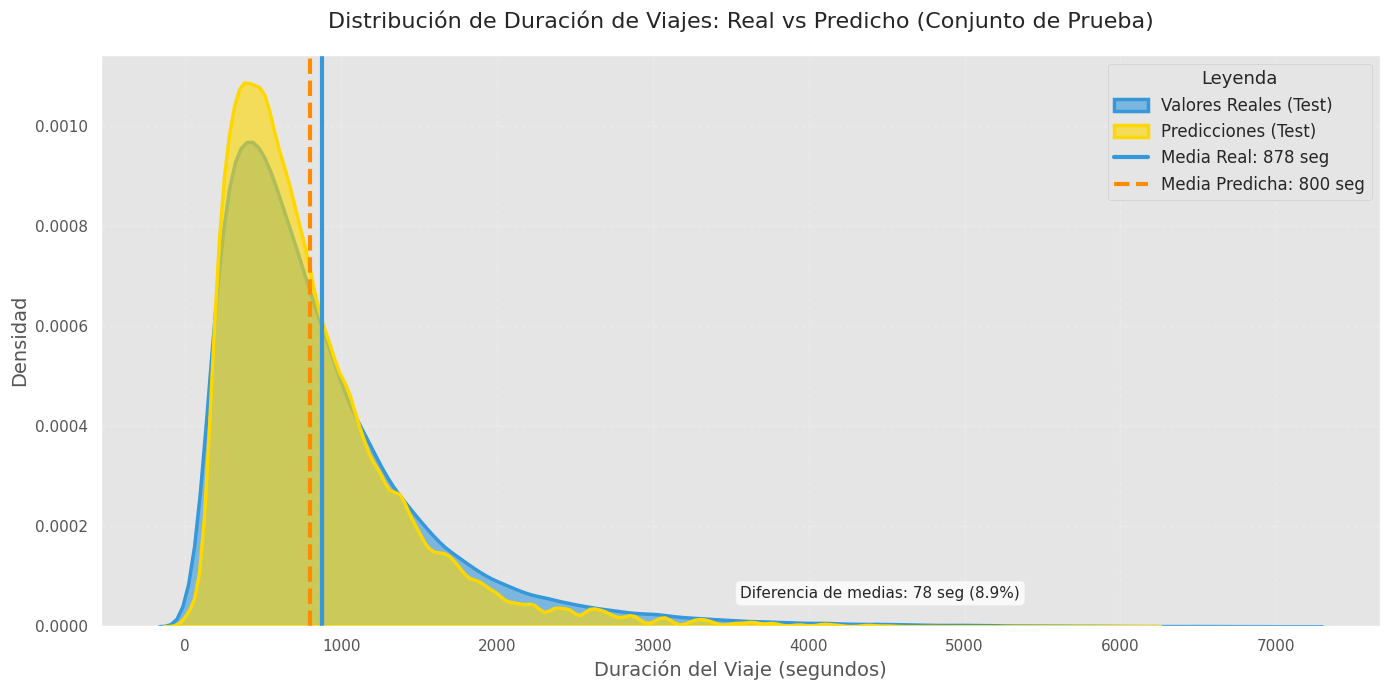

In [ ]:
plt.figure(figsize=(14, 7))

# Filtrar solo datos de prueba
df_test_results = pd.DataFrame({
    'Real': y_test,
    'Predicho': y_pred_test
})

# Paleta de colores actualizada
AZUL = '#3498db'
AMARILLO = '#FFD700'  # Amarillo dorado

# Crear gráfico de densidad solo para test
sns.kdeplot(data=df_test_results, x='Real',
            color=AZUL, fill=True, alpha=0.6, label='Valores Reales (Test)',
            linewidth=2.5)

sns.kdeplot(data=df_test_results, x='Predicho',
            color=AMARILLO, fill=True, alpha=0.6, label='Predicciones (Test)',
            linewidth=2.5, linestyle='-')

# Líneas verticales para las medias (solo test)
real_mean = np.mean(y_test)
pred_mean = np.mean(y_pred_test)
plt.axvline(x=real_mean, color=AZUL, linestyle='-', linewidth=3,
            label=f'Media Real: {real_mean:.0f} seg')
plt.axvline(x=pred_mean, color='#FF8C00', linestyle='--', linewidth=3,
            label=f'Media Predicha: {pred_mean:.0f} seg')

# Personalización
plt.title('Distribución de Duración de Viajes: Real vs Predicho (Conjunto de Prueba)',
          fontsize=16, pad=20)
plt.xlabel('Duración del Viaje (segundos)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.2)

# Leyenda mejorada
plt.legend(title='Leyenda', title_fontsize=13, fontsize=12,
           loc='upper right', frameon=True, framealpha=0.9)


# Añadir comparación de medias
plt.annotate(f'Diferencia de medias: {abs(real_mean - pred_mean):.0f} seg ({abs(real_mean - pred_mean)/real_mean*100:.1f}%)',
             xy=(0.5, 0.05), xycoords='axes fraction',
             fontsize=11, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

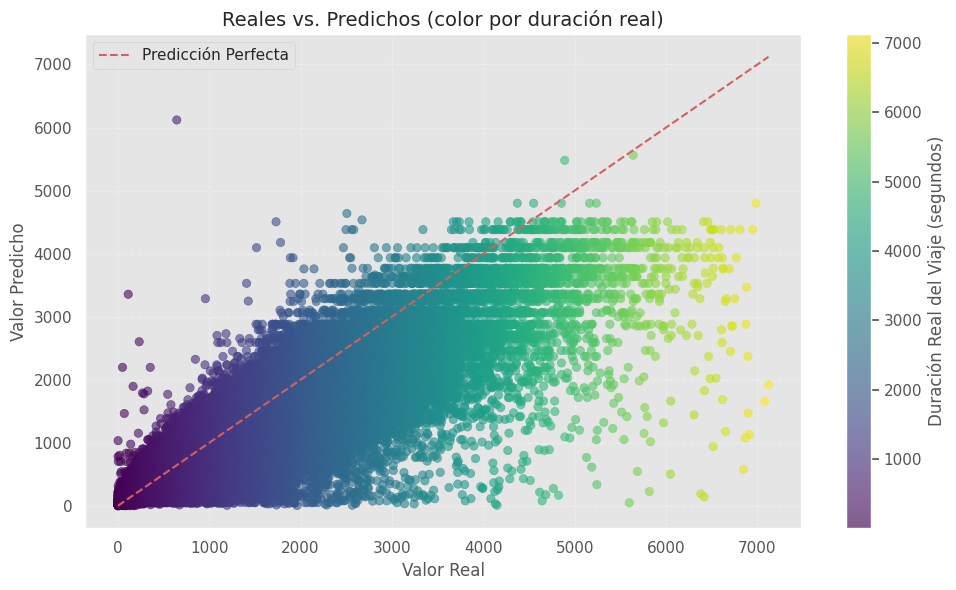

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred_test, c=y_test, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Duración Real del Viaje (segundos)')

# Línea ideal
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Predicción Perfecta')

plt.title('Reales vs. Predichos (color por duración real)', fontsize=14)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

